# Credit Card Users Churn Prediction 

### Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

**You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards**

You need to identify the best possible model that will give the required performance

**Objective**

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, * College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Solution Approach


* **Understand given data**
    * Check for Size/Duplicates/Null values/Sample Rows
   

* **Exploratory Data Analysis and Insights**
    * Univariate analysis
    * Bivariate analysis - 
    * Key meaningful observations


* **Data pre-processing**
    * Prepare the data for analysis
    * Feature Engineering
    * Missing value Treatment
    * Outlier Treatment


* **Model building**
    * Build 6 Different Models using default data & access performance
    
    
* **Model building - Oversampled data**
    * Build 6 Different Models using oversampled data & access performance


* **Model building - Undersampled data**
    * Build 6 Different Models using undersampled data & access performance


* **Choose to tune 3 models**
    * Tune Models using Hyperparameters using grid search


* **Hyperparameter tuning using random search**
     * Tune Models using Hyperparameters using random search


* **Model Performances**
    * Compare all models and pick best model

* **Productionize the model**
    * install workflow through pipelines

* **Actionable Insights & Recommendations**
   * Business recommendations and insights


# Solution


## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 

### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [1]:

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


<IPython.core.display.Javascript object>

## Load data to dataframe and check data & data type

Read given csv file `BankChurners.csv` and load to data frame `data`.

In [2]:
# reading csv data given from bank and load to data frame
bank_data = pd.read_csv("BankChurners.csv")
# copying orignal data so that when changing data we dont lose original
data = bank_data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [3]:
data.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [4]:
data.tail(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

**few categorical features and mostly numerical features** 

### Understand the shape of the dataset.

In [5]:
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

**observations on data** 

* Given dataset has 10127 rows and 21 columns
* CLIENTNUM Client number. Unique identifier for the customer holding the account column seems like continous num or row number, since its not related with other columns we can delete later. 
* Attrition_Flag is dependent feature

### Check the data types of the columns in the dataset.

checking data types of all columns 

### Drop CLIENTNUM Column

Since CLIENTNUM has no relation with other features and it is row number we can drop this column

In [6]:
# Drop CLIENTNUM Columns
data.drop("CLIENTNUM", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

In [7]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

<IPython.core.display.Javascript object>

In [8]:
data.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

**observations on data summary** 

* CLIENTNUM: Column Dropped since this column has no value for model & analysis
* Attrition_Flag: `Target Feature` - has 2 values. `Existing customers` has major occurence 8500, Remaining `Attrited Customer`
* Customer_Age: Age in Years - Age rangesfrom 26 to 73. Some possible outlier values because 75% is 52 and max is 73.
* Gender: Gender of the account holder - `Female` are 5358 and Remaining `Male`
* Dependent_count: Number of dependents - Values ranges from `0 to 5`. 
* Education_Level:  Educational Qualification  has `6 different values`, `Graduate` are most common with 3128 records 
* Marital_Status: Marital Status of the account holder - `3 Possible values` with `Married` are most common
* Income_Category: Annual Income Category of the account holder - `6 possible values`, `Less than 40K` are most common

* Card_Category: Type of Card - `4 different values` and `Blue being Majority` with 9436 records
* Months_on_book: Period of relationship with the bank - values ranges from `13 to 56`. and `Mean value is 36`
* Total_Relationship_Count: Total no. of products held by the customer - value ranges from `1 to 6` and `mean is almost 4`
* Months_Inactive_12_mon: No. of months inactive in the last 12 months - value ranges from `0 to 6` and `mean is around 2`
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months - value ranges from `0 to 6` and `mean value is 2`
* Credit_Limit: Credit Limit on the Credit Card - value ranges from `1438.3 to 34516.000` and with `possible outlier values` and `mean is around 8631.95`
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance - value ranges from `0 to 2517`, we have to check value distribution for check outlier values
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months), Value ranges from `3.0 to 34516.0` and `has outlier values`
* Total_Trans_Amt: Total Transaction Amount (Last 12 months) - value ranges from `510.0 to 18484.0` and `has outlier values`
* Total_Trans_Ct: Total Transaction Count (Last 12 months) - value ranges from `10.0 to 139.0` and `has outlier values`
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter - value ranges from `0 to 3.7` and `has outlier values`
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter - value ranges from `0 to 3.3` and `has outlier values`
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent - ranges from `0 to .99`  and `has outlier values`


###  Check for Duplicates Values
lets check for any duplicate values


In [9]:
# check for any duplicate data
data[data.duplicated()]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

<IPython.core.display.Javascript object>

**No Duplicate Data found, No actions reqd. **

### Let's check for missing values

lets check which columns has some null values, how many null values

In [10]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

missing count  missing %
Education_Level           1519   0.149995
Marital_Status             749   0.073961

<IPython.core.display.Javascript object>

**observations on data missing** 

* we have 2 features with missing value Education_Level has approx 15% missing values 
* Marital_Status has 7% missing values.

**We dont want to delete missing values. We have to treat these missing values so that we dont lose those data** 

### Checking columns to see how much of values are missing 

In [11]:
# counting the number of missing values per row

num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    7973
1    2040
2     114
dtype: int64

<IPython.core.display.Javascript object>

**observations on data missing by row** 

* 114 rows has both Marital_Status and Education_Level missing 
* 2040 rows has 1 missing value it might be either Marital_Status or Education_Level

#### checking data with 2 missing values and 1 missing value 


In [12]:
data[num_missing == 2].sample(n=15)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
3701  Existing Customer            43      M                3             NaN   
8166  Existing Customer            50      M                2             NaN   
9332  Existing Customer            56      M                1             NaN   
6406  Existing Customer            44      M                1             NaN   
6532  Existing Customer            43      F                2             NaN   
3770  Attrited Customer            38      M                2             NaN   
4558  Existing Customer            48      F                4             NaN   
2928  Existing Customer            43      F                4             NaN   
4840  Existing Customer            51      F                2             NaN   
6312  Attrited Customer            46      F                3             NaN   
3080  Existing Customer            51      M                2             NaN   
726   Existing Customer            42      M                5             NaN   
5322  Existing Customer            48      M                2             NaN   
9772  Existing Customer            30      M                1             NaN   
6732  Existing Customer            63      M                0             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
3701            NaN    $80K - $120K          Blue              38   
8166            NaN         $120K +          Blue              32   
9332            NaN     $60K - $80K          Blue              43   
6406            NaN    $80K - $120K          Blue              29   
6532            NaN  Less than $40K          Blue              36   
3770            NaN     $60K - $80K          Blue              26   
4558            NaN  Less than $40K          Blue              29   
2928            NaN             abc          Blue              34   
4840            NaN     $40K - $60K          Blue              44   
6312            NaN  Less than $40K          Blue              41   
3080            NaN    $80K - $120K          Blue              39   
726             NaN         $120K +          Blue              36   
5322            NaN     $40K - $60K          Blue              43   
9772            NaN  Less than $40K          Blue              13   
6732            NaN     $60K - $80K          Blue              46   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3701                         6                       2                      3   
8166                         2                       3                      1   
9332                         2                       2                      3   
6406                         6                       1                      2   
6532                         4                       3                      3   
3770                         2                       2                      3   
4558                         6                       3                      4   
2928                         5                       3                      3   
4840                         4                       6                      4   
6312                         5                       3                      2   
3080                         6                       1                      3   
726                          4                       1                      2   
5322                         5                       2                      2   
9772                         1                       3                      1   
6732                         6                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3701       20348.0                 1732          18616.0   
8166       25645.0                 1083          24562.0   
9332       10602.0                 1083           9519.0   
6406        8315.0                 1008           7307.0   
6532      

<IPython.core.display.Javascript object>

In [13]:
data[num_missing == 1].sample(n=15)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
5630  Existing Customer            44      F                1        Graduate   
5997  Existing Customer            52      F                3             NaN   
5673  Attrited Customer            31      F                1             NaN   
4909  Existing Customer            49      F                2             NaN   
4278  Existing Customer            44      M                4             NaN   
3171  Attrited Customer            41      F                3             NaN   
3721  Existing Customer            44      F                4             NaN   
4989  Existing Customer            49      M                3             NaN   
657   Attrited Customer            48      F                2             NaN   
4951  Attrited Customer            51      F                2             NaN   
7502  Existing Customer            49      F                4             NaN   
9189  Existing Customer            52      M                2      Uneducated   
6257  Existing Customer            40      F                4             NaN   
9461  Attrited Customer            34      M                3     High School   
4541  Attrited Customer            42      M                5             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
5630            NaN  Less than $40K          Blue              32   
5997         Single  Less than $40K          Blue              37   
5673         Single  Less than $40K          Blue              20   
4909         Single             abc          Blue              39   
4278         Single    $80K - $120K          Blue              38   
3171         Single     $40K - $60K          Blue              36   
3721        Married             abc          Blue              37   
4989        Married    $80K - $120K          Blue              43   
657         Married  Less than $40K          Blue              36   
4951        Married  Less than $40K          Blue              36   
7502         Single     $40K - $60K          Blue              39   
9189            NaN         $120K +          Blue              42   
6257        Married     $40K - $60K          Blue              30   
9461            NaN    $80K - $120K        Silver              21   
4541        Married     $60K - $80K          Blue              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5630                         3                       3                      3   
5997                         4                       2                      2   
5673                         3                       1                      2   
4909                         4                       1                      3   
4278                         5                       3                      4   
3171                         3                       2                      4   
3721                         4                       3                      3   
4989                         6                       1                      1   
657                          5                       1                      3   
4951                         1                       2                      2   
7502                         6                       2                      3   
9189                         1                       1                      3   
6257                         5                       2                      2   
9461                         1                       2                      3   
4541                         2                       3                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
5630        1780.0                 1338            442.0   
5997        1554.0                  926            628.0   
5673        1695.0                    0           1695.0   
4909       11320.0                    0          11320.0   
4278      

<IPython.core.display.Javascript object>

### Lets fix all missing values on data preprocessing step in missing value treatment.

* At times, the missing information is valuable itself, and to impute it with the most common class won’t be appropriate. In such a case, we can replace them with a value like “Unknown” or “Missing” using the fillna() method.

* since high % is missing replacing with high frequence value may result in imblance in data

In [14]:


# replacing missing with "unknown" Label for intial analysis
data.fillna("Unknown", inplace=True)


<IPython.core.display.Javascript object>

### Lets check what are different values we have for all category features 

In [15]:
category_cols = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]
print_category_value_counts(data, category_cols)



Column name : Attrition_Flag has total 2 unique values

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

--------------------------------------------------

Column name : Gender has total 2 unique values

F    5358
M    4769
Name: Gender, dtype: int64

--------------------------------------------------

Column name : Education_Level has total 7 unique values

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

--------------------------------------------------

Column name : Marital_Status has total 4 unique values

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

--------------------------------------------------

Column name : Income_Category has total 6 unique values

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K     

<IPython.core.display.Javascript object>

# Exploratory Data Analysis And Data processing 

## Univariate analysis & Bivariate analysis 

Visualize all features before any data clean up and understand what data needs cleaning and fixing.

##  Analysis on features and relation with Target feature 

Univariate analysis helps to check data skewness and possible outliers and spread of the data.
Bivariate analysis helps to check data relation between two features.

**creating a method that can plot univariate chart with histplot, boxplot and barchart %**

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>

### Cheking data falls outside IQR  - 3 *IQR Range

In [17]:
 # writing a method that can take a column as input and print all the values falling outside the range of Limts of IQR 
def check_outlier_using_IQR(column, limit=3):
    """
    Check Limts * IQR for each values and prints the ones falls outside the range.
    """
    quartiles = np.quantile(data[column][data[column].notnull()], [0.25, 0.75])
    limit_iqr = limit * (quartiles[1] - quartiles[0])
    outlier = data.loc[np.abs(data[column] - data[column].median()) > limit_iqr, column]
    print();
    print(f"Column : {column} Outlier(s) check");
    print(f"Mean : {data[column].mean()}, Median : {data[column].median()}, Min : {data[column].min()}, Max : {data[column].max()}");
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {limit}*IQR = {limit_iqr}, Total Outlier(s) : {outlier.size} \n")
    if outlier.size > 10:
        print(f"listing 10 sample outliers");
        print(outlier.sample(10))
    else:
        print(f"listing all outliers");
        print(outlier)
    print("-" * 50)



<IPython.core.display.Javascript object>

####  Analysis on Customer_age

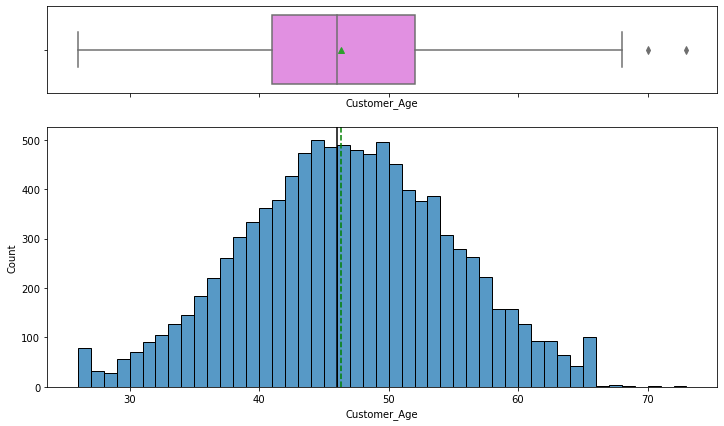

<IPython.core.display.Javascript object>

In [18]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

In [19]:
# checking outliers range
check_outlier_using_IQR("Customer_Age", 3)


Column : Customer_Age Outlier(s) check
Mean : 46.32596030413745, Median : 46.0, Min : 26, Max : 73
Q1 = 41.0, Q3 = 52.0, 3*IQR = 33.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Customer_Age, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Customer_age


* Data normally distributed. Mean and Median are almost same around 46 yrs. 
* We see 2 outliers on Box plot but none of those outliers are beyond 3 * IQR range.
* No outlier treatments reqd.
* No missing data

####  Analysis on Dependent_count

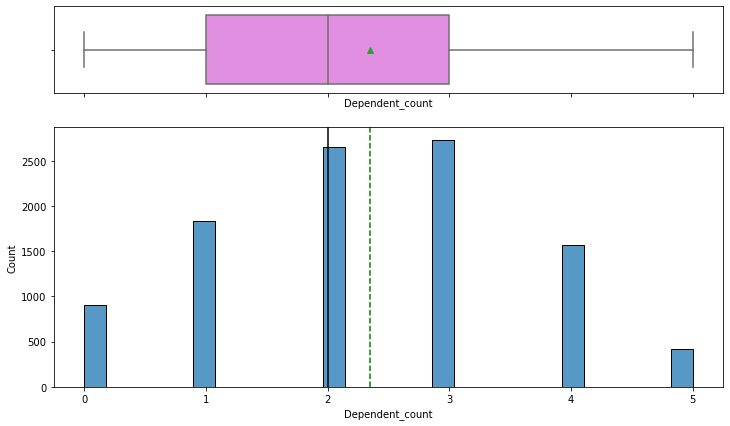

<IPython.core.display.Javascript object>

In [20]:
# Observations on Dependent_count
histogram_boxplot(data, "Dependent_count")

In [21]:
# checking outliers range
check_outlier_using_IQR("Dependent_count", 3)


Column : Dependent_count Outlier(s) check
Mean : 2.3462032191172115, Median : 2.0, Min : 0, Max : 5
Q1 = 1.0, Q3 = 3.0, 3*IQR = 6.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Dependent_count, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Dependent_count
* Data normally distributed. Small difference in mean and median.
* Data has no outliers
* No missing data

####  Analysis on Months_on_book

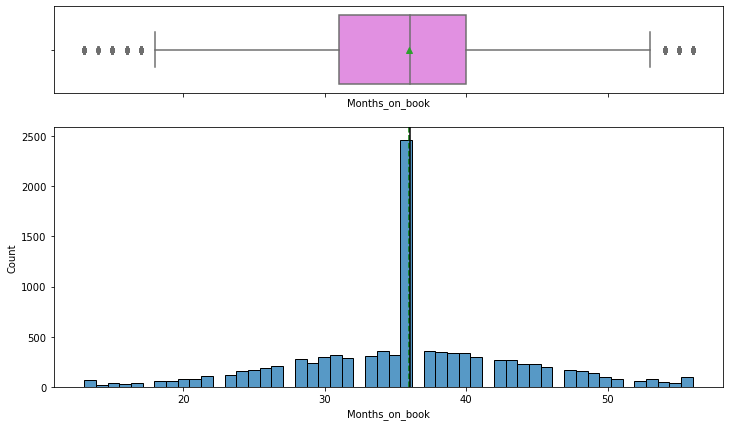

<IPython.core.display.Javascript object>

In [22]:
# Observations on Months_on_book
histogram_boxplot(data, "Months_on_book")

In [23]:
# checking outliers range
check_outlier_using_IQR("Months_on_book", 3)


Column : Months_on_book Outlier(s) check
Mean : 35.928409203120374, Median : 36.0, Min : 13, Max : 56
Q1 = 31.0, Q3 = 40.0, 3*IQR = 27.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Months_on_book, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Months_on_book
* Data normally distributed.  Seems like peek in the middle, But mean and median matching so no effects from outliers.
* we see some outliers in Box plot but nothing falls beyond 3 * IQR Range. Since mean and median matching no outlier treatment required.
* No missing data

####  Analysis on Total_Relationship_Count

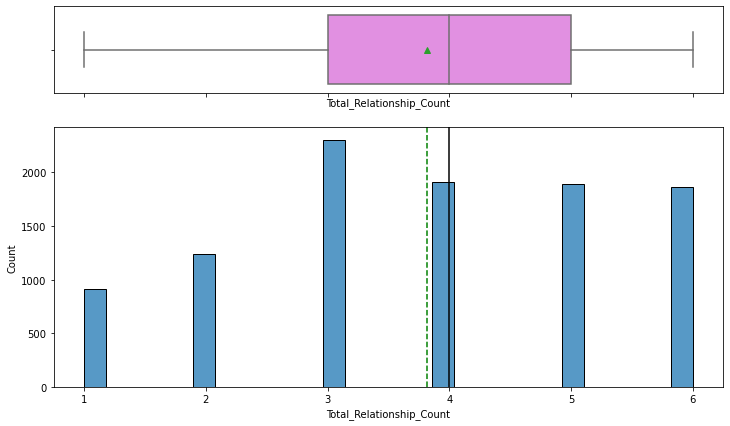

<IPython.core.display.Javascript object>

In [24]:
# Observations on Total_Relationship_Count
histogram_boxplot(data, "Total_Relationship_Count")

In [25]:
# checking outliers range
check_outlier_using_IQR("Total_Relationship_Count", 3)


Column : Total_Relationship_Count Outlier(s) check
Mean : 3.8125802310654686, Median : 4.0, Min : 1, Max : 6
Q1 = 3.0, Q3 = 5.0, 3*IQR = 6.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Total_Relationship_Count, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Relationship_Count

* Data normally distributed. Small difference in mean and median.
* Data has no outliers
* No missing data

####  Analysis on Months_Inactive_12_mon

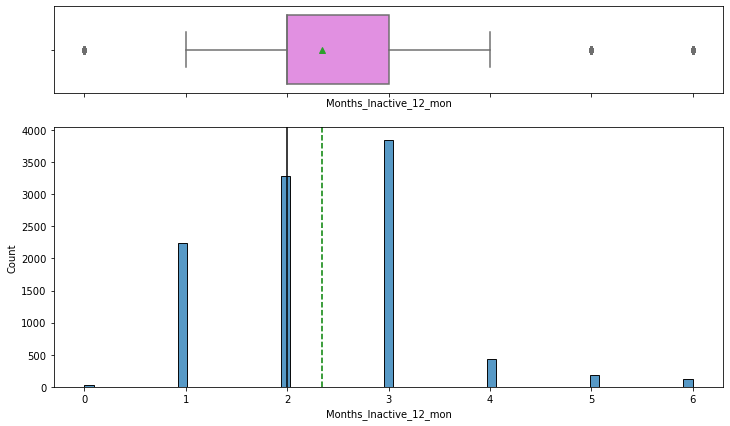

<IPython.core.display.Javascript object>

In [26]:
# Observations on Months_Inactive_12_mon
histogram_boxplot(data, "Months_Inactive_12_mon")

In [27]:
# checking outliers range
check_outlier_using_IQR("Months_Inactive_12_mon", 3)


Column : Months_Inactive_12_mon Outlier(s) check
Mean : 2.3411671768539546, Median : 2.0, Min : 0, Max : 6
Q1 = 2.0, Q3 = 3.0, 3*IQR = 3.0, Total Outlier(s) : 124 

listing 10 sample outliers
12      6
2111    6
4621    6
477     6
8540    6
4594    6
6535    6
8200    6
2104    6
6105    6
Name: Months_Inactive_12_mon, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Months_Inactive_12_mon
* Data ranges from 0 to 6. Mean and Median almost matching. 
* We see some outliers in box plots and total 124 with values 6 months. Any customers with 6 months or more showing as outlier. But all seems like valid data. So no treatment on outliers.
* data has no missing values.

####  Analysis on Contacts_Count_12_mon

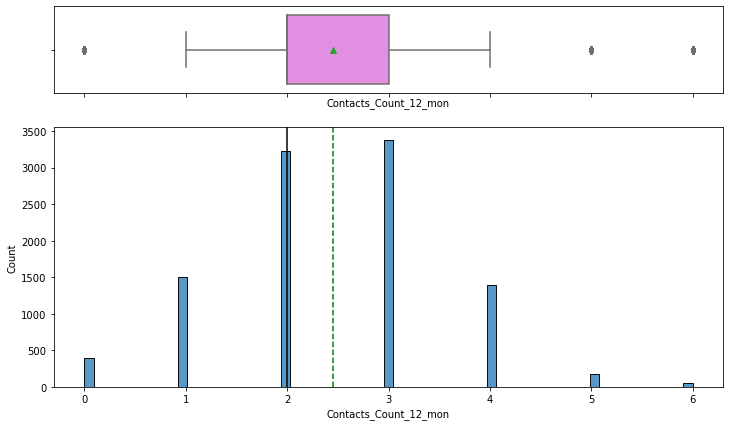

<IPython.core.display.Javascript object>

In [28]:
# Observations on Contacts_Count_12_mon
histogram_boxplot(data, "Contacts_Count_12_mon")

In [29]:
# checking outliers range
check_outlier_using_IQR("Contacts_Count_12_mon", 3)


Column : Contacts_Count_12_mon Outlier(s) check
Mean : 2.4553174681544387, Median : 2.0, Min : 0, Max : 6
Q1 = 2.0, Q3 = 3.0, 3*IQR = 3.0, Total Outlier(s) : 54 

listing 10 sample outliers
6801    6
9809    6
3049    6
4189    6
9655    6
5117    6
3157    6
3851    6
7223    6
9212    6
Name: Contacts_Count_12_mon, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Contacts_Count_12_mon
* Data normally distributed. Where mean and median are almost matching.
* Customers with no contact count or with more than 5 contacts count are showing are outliers. But no outlier treatment required since all these values are valid.
* Data has no missing data. 

####  Analysis on Credit_Limit

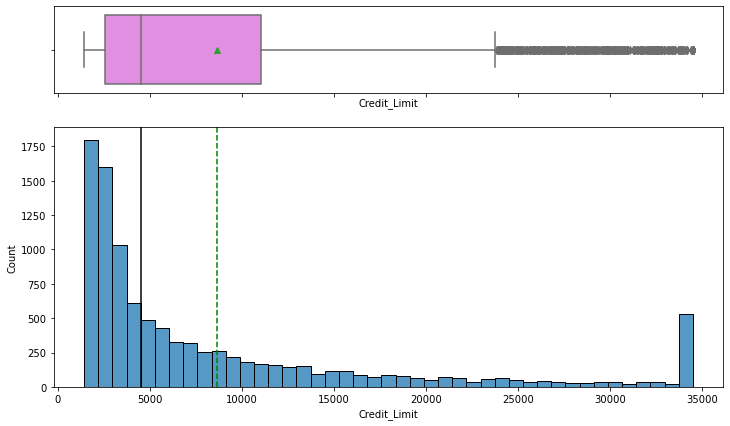

<IPython.core.display.Javascript object>

In [30]:
# Observations on Credit_Limit
histogram_boxplot(data, "Credit_Limit")

In [31]:
# checking outliers range
check_outlier_using_IQR("Credit_Limit", 3)


Column : Credit_Limit Outlier(s) check
Mean : 8631.953698034848, Median : 4549.0, Min : 1438.3, Max : 34516.0
Q1 = 2555.0, Q3 = 11067.5, 3*IQR = 25537.5, Total Outlier(s) : 664 

listing 10 sample outliers
9847    34516.0
480     34516.0
3867    34516.0
8113    34516.0
2604    33996.0
9967    33905.0
1285    34516.0
2010    31762.0
2916    34516.0
1025    34516.0
Name: Credit_Limit, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Credit_Limit
* Data is heavyly right skewed.
* Lot of outliers beyound 4275.0, Mean and Median is not matching or even close because of outliers effect. 
* `Action - Outlier Treatment and data transformation required`
* No Missing data.

### lets check outlier data for Credit_Limit

In [32]:
data[data["Credit_Limit"] > 26000].sample(25)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
6411  Attrited Customer            44      F                2     High School   
2652  Existing Customer            38      M                2   Post-Graduate   
4140  Existing Customer            45      F                2     High School   
9630  Existing Customer            36      M                2     High School   
8768  Existing Customer            50      M                1         Unknown   
8739  Existing Customer            60      F                1       Doctorate   
9113  Existing Customer            45      M                2        Graduate   
9764  Existing Customer            31      F                0         College   
490   Existing Customer            48      M                3     High School   
5020  Existing Customer            50      M                2         Unknown   
4165  Existing Customer            57      M                2     High School   
9227  Attrited Customer            60      M                0         College   
6371  Existing Customer            55      M                2      Uneducated   
9024  Existing Customer            52      M                2       Doctorate   
6537  Existing Customer            37      M                3         Unknown   
9714  Attrited Customer            39      M                2      Uneducated   
8733  Existing Customer            55      M                3     High School   
79    Existing Customer            47      M                2        Graduate   
280   Existing Customer            43      M                1        Graduate   
9532  Existing Customer            45      M                4        Graduate   
2786  Existing Customer            43      M                2        Graduate   
9727  Existing Customer            37      M                1      Uneducated   
6907  Attrited Customer            62      M                0   Post-Graduate   
8857  Attrited Customer            52      M                1     High School   
7799  Existing Customer            40      M                3         College   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6411        Unknown             abc          Gold              35   
2652         Single     $60K - $80K        Silver              36   
4140         Single             abc          Blue              37   
9630        Married         $120K +          Blue              36   
8768        Unknown         $120K +        Silver              45   
8739         Single             abc        Silver              48   
9113        Married     $60K - $80K      Platinum              31   
9764        Married             abc        Silver              24   
490         Married    $80K - $120K          Blue              36   
5020        Married         $120K +          Gold              35   
4165         Single    $80K - $120K          Blue              52   
9227        Married    $80K - $120K          Blue              50   
6371         Single     $60K - $80K        Silver              48   
9024        Married         $120K +          Blue              44   
6537         Single    $80K - $120K          Blue              22   
9714        Married         $120K +        Silver              19   
8733         Single    $80K - $120K          Gold              49   
79          Married    $80K - $120K          Blue              38   
280          Single    $80K - $120K        Silver              37   
9532        Married    $80K - $120K          Blue              32   
2786        Married         $120K +        Silver              31   
9727        Married         $120K +          Blue              17   
6907       Divorced     $60K - $80K        Silver              46   
8857        Married         $120K +          Blue              34   
7799       Divorced    $80K - $120K        Silver              34   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6411                      

<IPython.core.display.Javascript object>

#### observations on outliers 

* All data looks valid. All high credit limit customers has 1 or more dependents. And getting income more than 60K, Most of the customers falls beyond 80K and all of them we checking are having accounts more than a year and doing lot of transactions. 

* We can assume all the data is valid.

#### Log transform Credit Limit to change data distribution 



In [33]:
# Creating method to show log transformation


def showLogTransformation(cols_to_log, bins=20):
    for colname in cols_to_log:
        plt.hist(data[colname], bins)
        plt.title(colname)
        plt.show()
        plt.hist(np.log(data[colname] + 1), bins)
        plt.title(f"log transformation({colname})")
        plt.show()


def applyLogTransformation(cols_to_log):
    for colname in cols_to_log:
        data[colname + "_log"] = np.log(data[colname] + 1)
    data.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

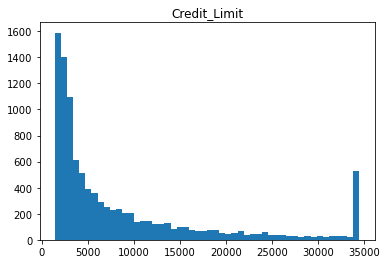

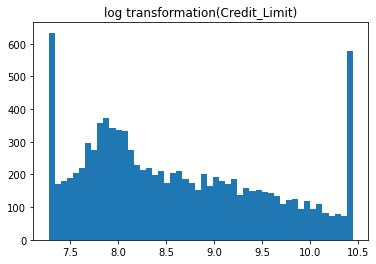

<IPython.core.display.Javascript object>

In [34]:
# Checking how Log Transformed data looking
showLogTransformation(["Credit_Limit"], 50)

**log transformed credit limit showing better data distribution.**

**lets add log transformed credit limit and rerun initial analysis on that feature** 

In [35]:
# Applying Log Transformed data and deleting existing feature
applyLogTransformation(["Credit_Limit"])

<IPython.core.display.Javascript object>

####  Analysis on Credit_Limit_Log

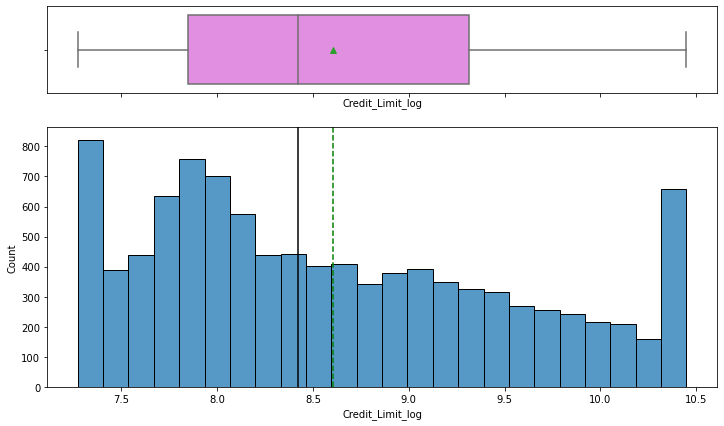

<IPython.core.display.Javascript object>

In [36]:
# Observations on Credit_Limit
histogram_boxplot(data, "Credit_Limit_log")

In [37]:
# checking outliers range
check_outlier_using_IQR("Credit_Limit_log", 3)


Column : Credit_Limit_log Outlier(s) check
Mean : 8.60367493269847, Median : 8.422882511944996, Min : 7.271912163268625, Max : 10.44920723527944
Q1 = 7.846198815497425, Q3 = 9.31185851414622, 3*IQR = 4.396979095946383, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Credit_Limit_log, dtype: float64)
--------------------------------------------------


<IPython.core.display.Javascript object>

**observation : mean and median almost matching. And no outliers shown in box plot**

####  Analysis on Total_Revolving_Bal

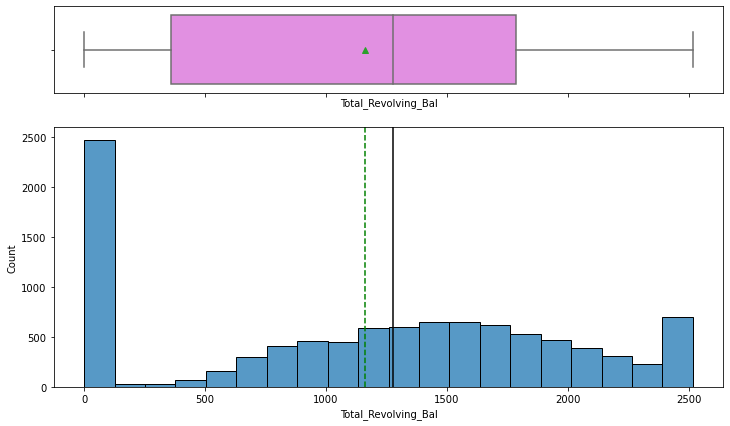

<IPython.core.display.Javascript object>

In [38]:
# Observations on Total_Revolving_Bal
histogram_boxplot(data, "Total_Revolving_Bal")

In [39]:
# checking outliers range
check_outlier_using_IQR("Total_Revolving_Bal", 3)


Column : Total_Revolving_Bal Outlier(s) check
Mean : 1162.8140614199665, Median : 1276.0, Min : 0, Max : 2517
Q1 = 359.0, Q3 = 1784.0, 3*IQR = 4275.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Total_Revolving_Bal, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Revolving_Bal
* Mean and Median almost matching. 
* No Outliers
* No Data missing

#### Log transform Total Revolving Bal to change data distribution 


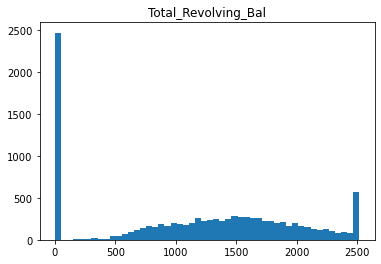

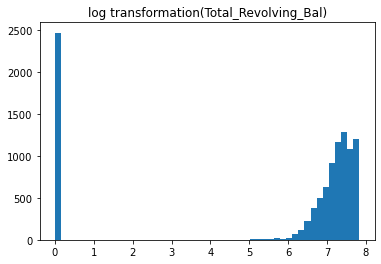

<IPython.core.display.Javascript object>

In [40]:
# Checking how Log Transformed data looking
showLogTransformation(["Total_Revolving_Bal"], 50)

In [41]:
# Applying Log Transformed data and deleting existing feature
applyLogTransformation(["Total_Revolving_Bal"])

<IPython.core.display.Javascript object>

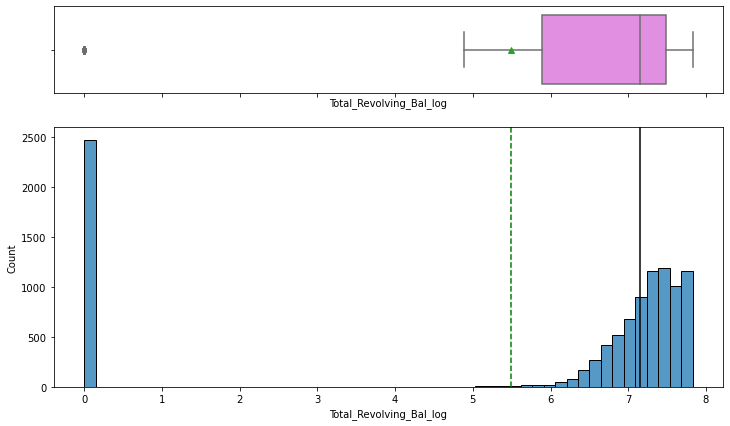

<IPython.core.display.Javascript object>

In [42]:
# Observations on Credit_Limit
histogram_boxplot(data, "Total_Revolving_Bal_log")

In [43]:
# checking outliers range
check_outlier_using_IQR("Total_Revolving_Bal_log", 3)


Column : Total_Revolving_Bal_log Outlier(s) check
Mean : 5.491204393083048, Median : 7.152268856032539, Min : 0.0, Max : 7.831220214604293
Q1 = 5.886088599113236, Q3 = 7.487173694213739, 3*IQR = 4.803255285301509, Total Outlier(s) : 2470 

listing 10 sample outliers
4044    0.0
3472    0.0
4108    0.0
8062    0.0
3795    0.0
2       0.0
4941    0.0
5633    0.0
4282    0.0
9820    0.0
Name: Total_Revolving_Bal_log, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Revolving_Bal_log
* 0 is not outliers, Its valid value. Now all values ranging from 0 to 8 

####  Analysis on Avg_Open_To_Buy

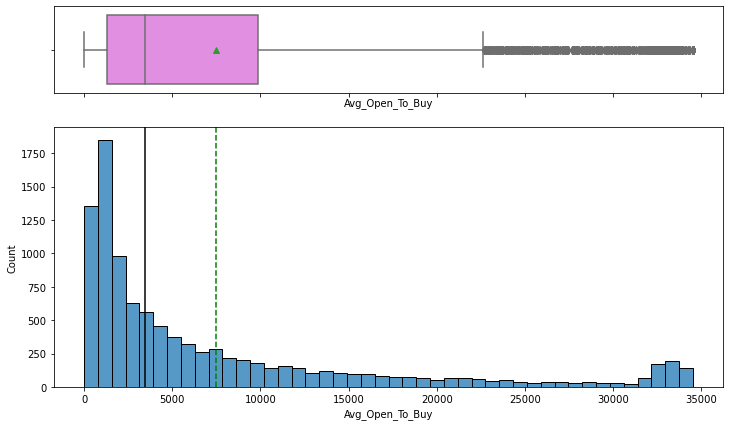

<IPython.core.display.Javascript object>

In [44]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy")

In [45]:
# checking outliers range
check_outlier_using_IQR("Avg_Open_To_Buy", 3)


Column : Avg_Open_To_Buy Outlier(s) check
Mean : 7469.139636614887, Median : 3474.0, Min : 3.0, Max : 34516.0
Q1 = 1324.5, Q3 = 9859.0, 3*IQR = 25603.5, Total Outlier(s) : 659 

listing 10 sample outliers
9665     34227.0
2984     33859.0
9295     33385.0
10024    32439.0
2758     32887.0
9259     34516.0
3682     34516.0
9462     32793.0
9664     32553.0
1022     31999.0
Name: Avg_Open_To_Buy, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Avg_Open_To_Buy
* Data is heavy right skewed.
* Lot of outliers and huge difference between mean and median. 
* But this feature is related with credit limit so all the outlier data are real data and those are valid.

#### Log transformation on Avg_Open_To_Buy

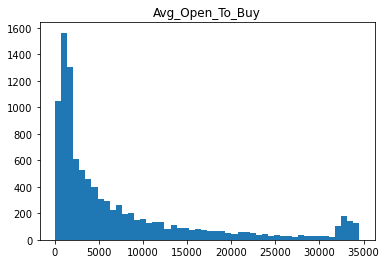

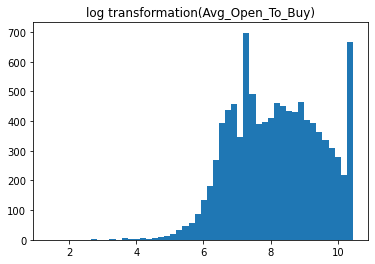

<IPython.core.display.Javascript object>

In [46]:
# Checking how Log Transformed data looking
showLogTransformation(["Avg_Open_To_Buy"], 50)

In [47]:
# Applying Log Transformed data and deleting existing feature
applyLogTransformation(["Avg_Open_To_Buy"])

<IPython.core.display.Javascript object>

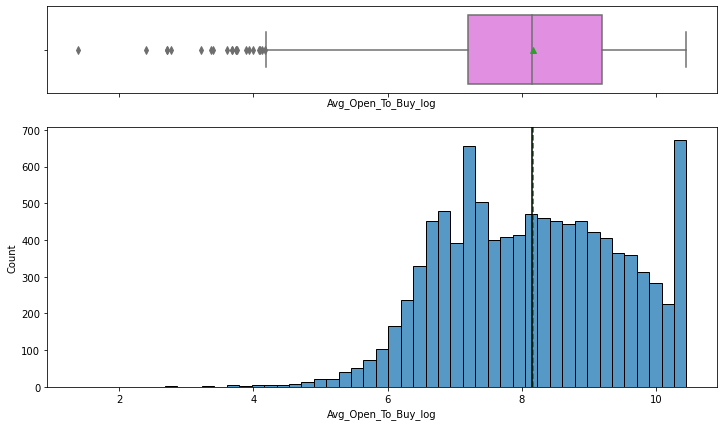

<IPython.core.display.Javascript object>

In [48]:
# Observations on Credit_Limit
histogram_boxplot(data, "Avg_Open_To_Buy_log")

In [49]:
# checking outliers range
check_outlier_using_IQR("Avg_Open_To_Buy_log", 3)


Column : Avg_Open_To_Buy_log Outlier(s) check
Mean : 8.164538314637664, Median : 8.153349757998892, Min : 1.3862943611198906, Max : 10.44920723527944
Q1 = 7.189544954583065, Q3 = 9.196241427024697, 3*IQR = 6.020089417324897, Total Outlier(s) : 1 

listing all outliers
4443    1.386294
Name: Avg_Open_To_Buy_log, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Avg_Open_To_Buy_log

* Mean and Median almost matching after data transformation
* no outliers 

####  Analysis on Total_Amt_Chng_Q4_Q1

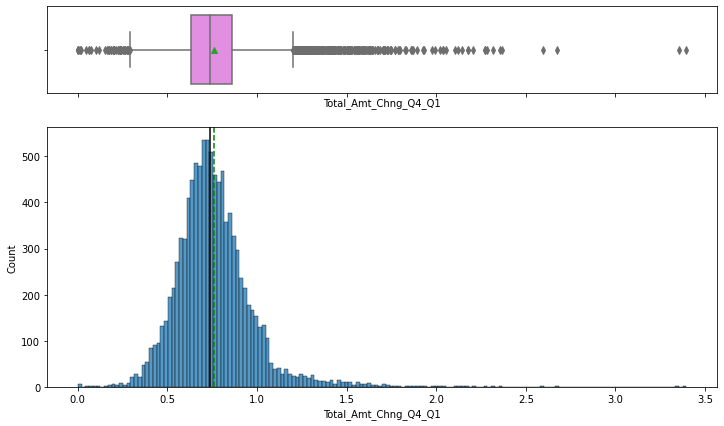

<IPython.core.display.Javascript object>

In [50]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

In [51]:
# checking outliers range
check_outlier_using_IQR("Total_Amt_Chng_Q4_Q1", 3)


Column : Total_Amt_Chng_Q4_Q1 Outlier(s) check
Mean : 0.7599406536980376, Median : 0.736, Min : 0.0, Max : 3.397
Q1 = 0.631, Q3 = 0.859, 3*IQR = 0.6839999999999999, Total Outlier(s) : 158 

listing 10 sample outliers
1786    1.504
1698    1.483
1166    1.596
1105    1.494
984     1.451
1883    1.669
1008    1.593
3270    1.675
2498    1.454
929     1.458
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Amt_Chng_Q4_Q1
* Data almost normally distributed. 
* Data has outlier on both low and high ends, But mean and median almost matching so outlier has no effects on data.
* All outlier data looks valid.
* No data missing or no transformation required because all data alread within 0 to 4 range.

####  Analysis on Total_Trans_Amt

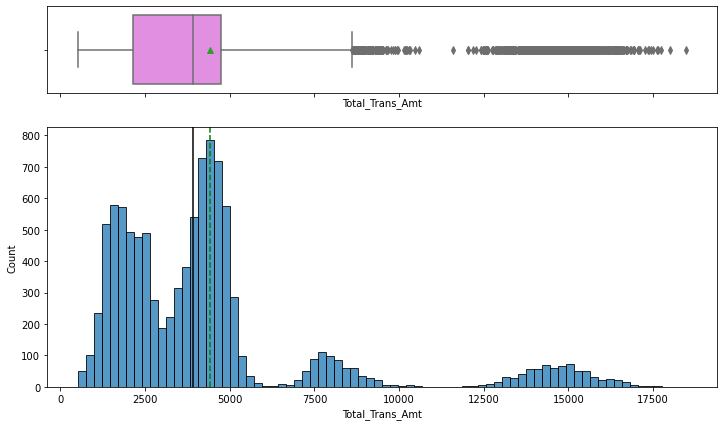

<IPython.core.display.Javascript object>

In [52]:
# Observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt")

In [53]:
# checking outliers range
check_outlier_using_IQR("Total_Trans_Amt", 3)


Column : Total_Trans_Amt Outlier(s) check
Mean : 4404.086303939963, Median : 3899.0, Min : 510, Max : 18484
Q1 = 2155.5, Q3 = 4741.0, 3*IQR = 7756.5, Total Outlier(s) : 746 

listing 10 sample outliers
9891     15442
9295     14716
9174     12896
9594     16493
9438     13513
10086    16177
9799     15886
9786     15471
9583     15514
9262     12867
Name: Total_Trans_Amt, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Trans_Amt
* Data is right skewed.
* lot of outlier on the right hand side. We have to normalize data.
* transaction amount are less than credit limit so all data seems valid.

#### Log transformation on Total_Trans_Amt

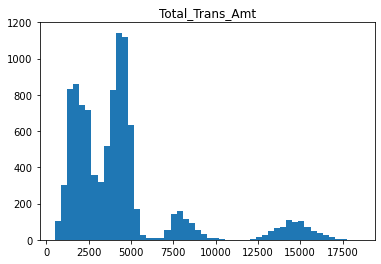

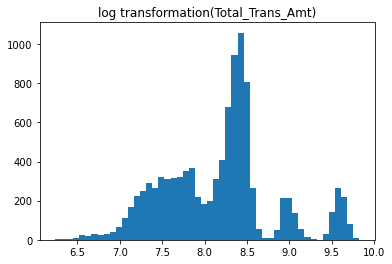

<IPython.core.display.Javascript object>

In [54]:
# Checking how Log Transformed data looking
showLogTransformation(["Total_Trans_Amt"], 50)

In [55]:
# Applying Log Transformed data and deleting existing feature
applyLogTransformation(["Total_Trans_Amt"])

<IPython.core.display.Javascript object>

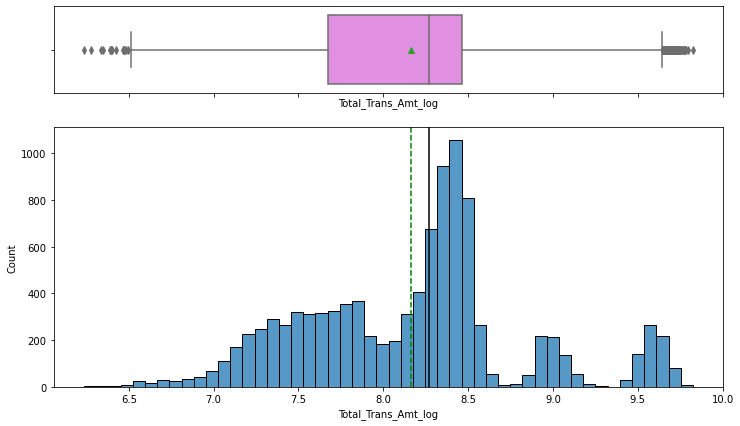

<IPython.core.display.Javascript object>

In [56]:
# Observations on Credit_Limit
histogram_boxplot(data, "Total_Trans_Amt_log")

In [57]:
# checking outliers range
check_outlier_using_IQR("Total_Trans_Amt_log", 3)


Column : Total_Trans_Amt_log Outlier(s) check
Mean : 8.165163993911522, Median : 8.268731832117737, Min : 6.236369590203704, Max : 9.824714871370732
Q1 = 7.676241789209022, Q3 = 8.464214266625351, 3*IQR = 2.3639174322489884, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Total_Trans_Amt_log, dtype: float64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Trans_Amt

* Mean and Median almost matching after data transformation
* all data showing left and right beyond limit are valid.

####  Analysis on Total_Trans_Ct

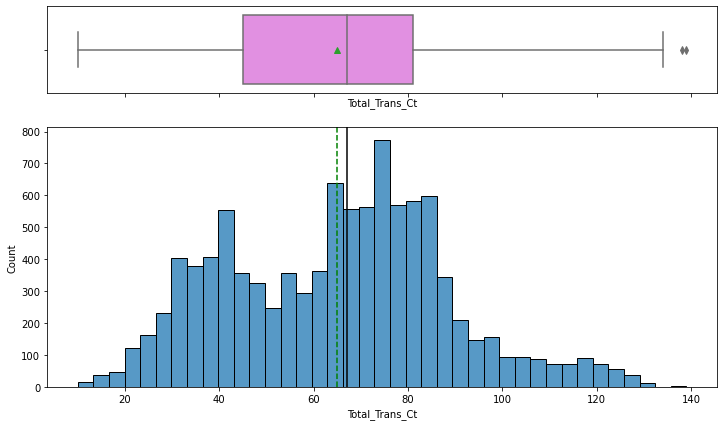

<IPython.core.display.Javascript object>

In [58]:
# Observations on Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct")

In [59]:
# checking outliers range
check_outlier_using_IQR("Total_Trans_Ct", 3)


Column : Total_Trans_Ct Outlier(s) check
Mean : 64.85869457884863, Median : 67.0, Min : 10, Max : 139
Q1 = 45.0, Q3 = 81.0, 3*IQR = 108.0, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Total_Trans_Ct, dtype: int64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Trans_Ct
* Data normally distributed. 
* No outliers data, Mean and Median almost matching.
* No missing data
* No Data Transformation required.

####  Analysis on Total_Ct_Chng_Q4_Q1

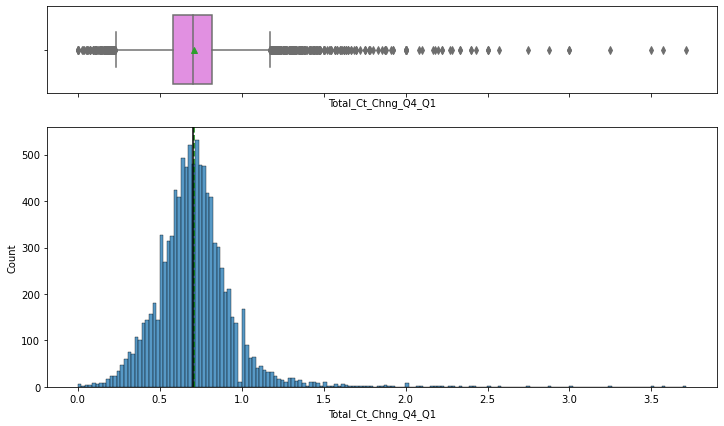

<IPython.core.display.Javascript object>

In [60]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

In [61]:
# checking outliers range
check_outlier_using_IQR("Total_Ct_Chng_Q4_Q1", 3)


Column : Total_Ct_Chng_Q4_Q1 Outlier(s) check
Mean : 0.7122223758269962, Median : 0.702, Min : 0.0, Max : 3.714
Q1 = 0.582, Q3 = 0.818, 3*IQR = 0.708, Total Outlier(s) : 123 

listing 10 sample outliers
1256    2.000
324     1.875
1041    1.750
392     1.636
457     1.500
432     1.429
69      2.000
1972    1.444
2358    1.882
2510    2.500
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Total_Ct_Chng_Q4_Q1
* Data mostly normally distributed but with a long right tail.
* All Data seems valid and Mean and Median is almost matching.
* All Outlier data are valid.
* No missing data
* No Data Transformation required.

####  Analysis on Avg_Utilization_Ratio

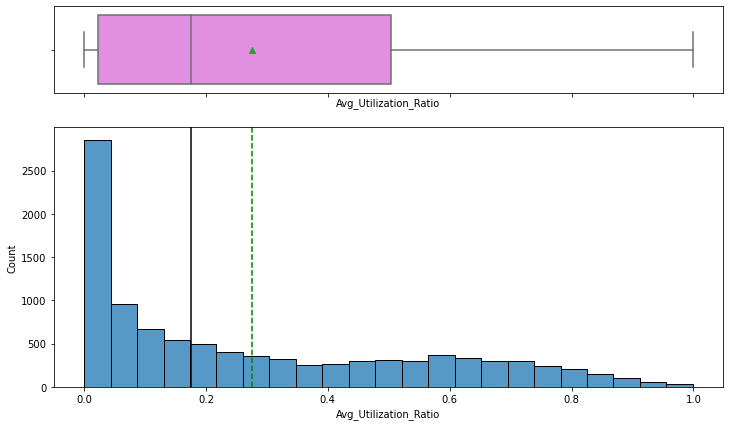

<IPython.core.display.Javascript object>

In [62]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio")

In [63]:
# checking outliers range
check_outlier_using_IQR("Avg_Utilization_Ratio", 3)


Column : Avg_Utilization_Ratio Outlier(s) check
Mean : 0.2748935518909845, Median : 0.176, Min : 0.0, Max : 0.999
Q1 = 0.023, Q3 = 0.503, 3*IQR = 1.44, Total Outlier(s) : 0 

listing all outliers
Series([], Name: Avg_Utilization_Ratio, dtype: float64)
--------------------------------------------------


<IPython.core.display.Javascript object>

####  Observations on Avg_Utilization_Ratio
* Data distributon has long tail.
* mean and median are close and no outliers shown.
* No missing data
* No Data Transformation required.

####  Analysis on Attrition_Flag

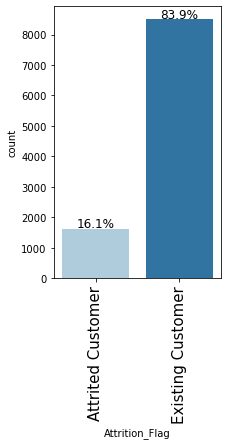

<IPython.core.display.Javascript object>

In [64]:
# Observations on Attrition_Flag
labeled_barplot(data, "Attrition_Flag", True)

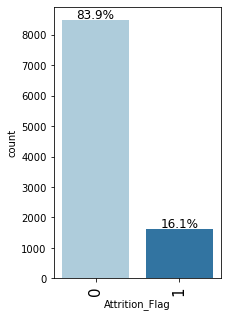

<IPython.core.display.Javascript object>

In [65]:
replaceStruct = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1}}

data = data.replace(replaceStruct)
data["Attrition_Flag"] = data["Attrition_Flag"].astype("int64")
labeled_barplot(data=data, feature="Attrition_Flag", perc=True)

####  Observations on Attrition_Flag
* This is target feature, But imbalance data we have to handle this when building model. 
* 16% customers left. 84% Existing customer. 
* No Missing Values 
* Replaced values with 0 and 1 and change to int64 category

####  Analysis on Gender

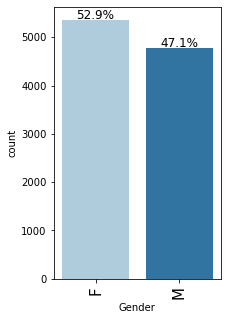

<IPython.core.display.Javascript object>

In [66]:
# Observations on Gender
labeled_barplot(data, "Gender", True)

####  Observations on Gender
* 53% customers are female. 47% customer are male. 
* No Missing Values 

####  Analysis on Education_Level

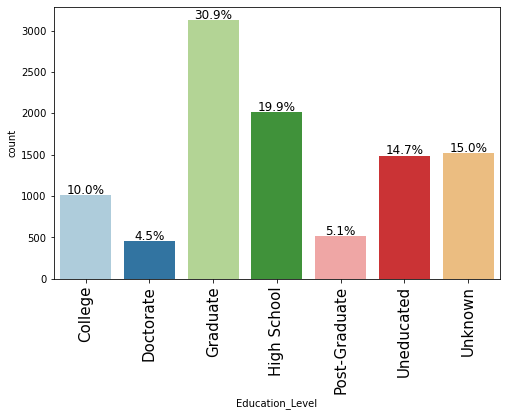

<IPython.core.display.Javascript object>

In [67]:
# Observations on Education_Level
labeled_barplot(data, "Education_Level", True)

####  Observations on Education_Level
* 31% customers are Graduate. Followed by other educational level. 
* 15% Data is missing/unknown Label. We have to figure out what those missing values are and impute those.
* we can replace unknown with most frequent or we can leave unknown as a type as it is



####  Analysis on Marital_Status

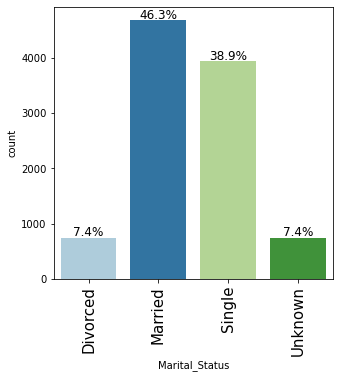

<IPython.core.display.Javascript object>

In [68]:
# Observations on Marital_Status
labeled_barplot(data, "Marital_Status", True)

####  Observations on Marital_Status
* 46% customers are married, 39% customers are single. 
* 7.4% Customers Marital_Status are missing/unknown.
* we can replace unknown with most frequent or we can leave unknown as a type as it is

####  Analysis on Income_Category

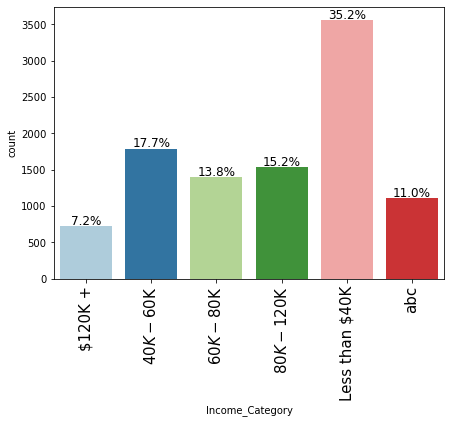

<IPython.core.display.Javascript object>

In [69]:
# Observations on Income_Category
labeled_barplot(data, "Income_Category", True)

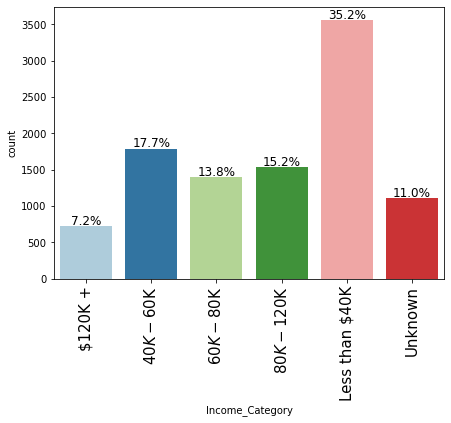

<IPython.core.display.Javascript object>

In [70]:
# Replacing abc with Unknown to keep it similar with other fields

replaceStruct = {"Income_Category": {"abc": "Unknown"}}

data = data.replace(replaceStruct)
labeled_barplot(data=data, feature="Income_Category", perc=True)

####  Observations on Income_Category
* 35% customers income category is beflow 40K
* 11% of income category called as abc - we have replaced it as Unknown
* we can replace unknown with most frequent or we can leave unknown as a type as it is

####  Analysis on Card_Category

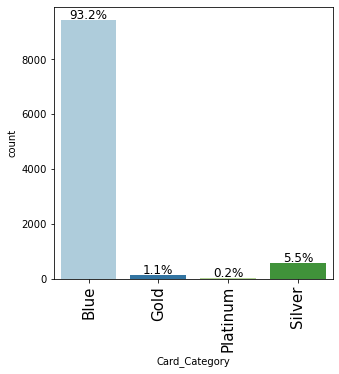

<IPython.core.display.Javascript object>

In [71]:
# Observations on Card_Category
labeled_barplot(data, "Card_Category", True)

####  Observations on Card_Category
* 93% customers hold blue card.
* All other card types are very low 

### Some features are listed as objects we can change these to category types

**Saving memory space**

### convert object to category types

In [72]:
category_cols = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

data[category_cols] = data[category_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 13  Total_Trans_Ct            10127 non-null  int6

<IPython.core.display.Javascript object>

**observations on data types** 

saved .4MB space after changing all object to category values

`Given Dataset has 6 Category features and 14 numerical features`

### Bivariate Analysis

### Data correlation analysis

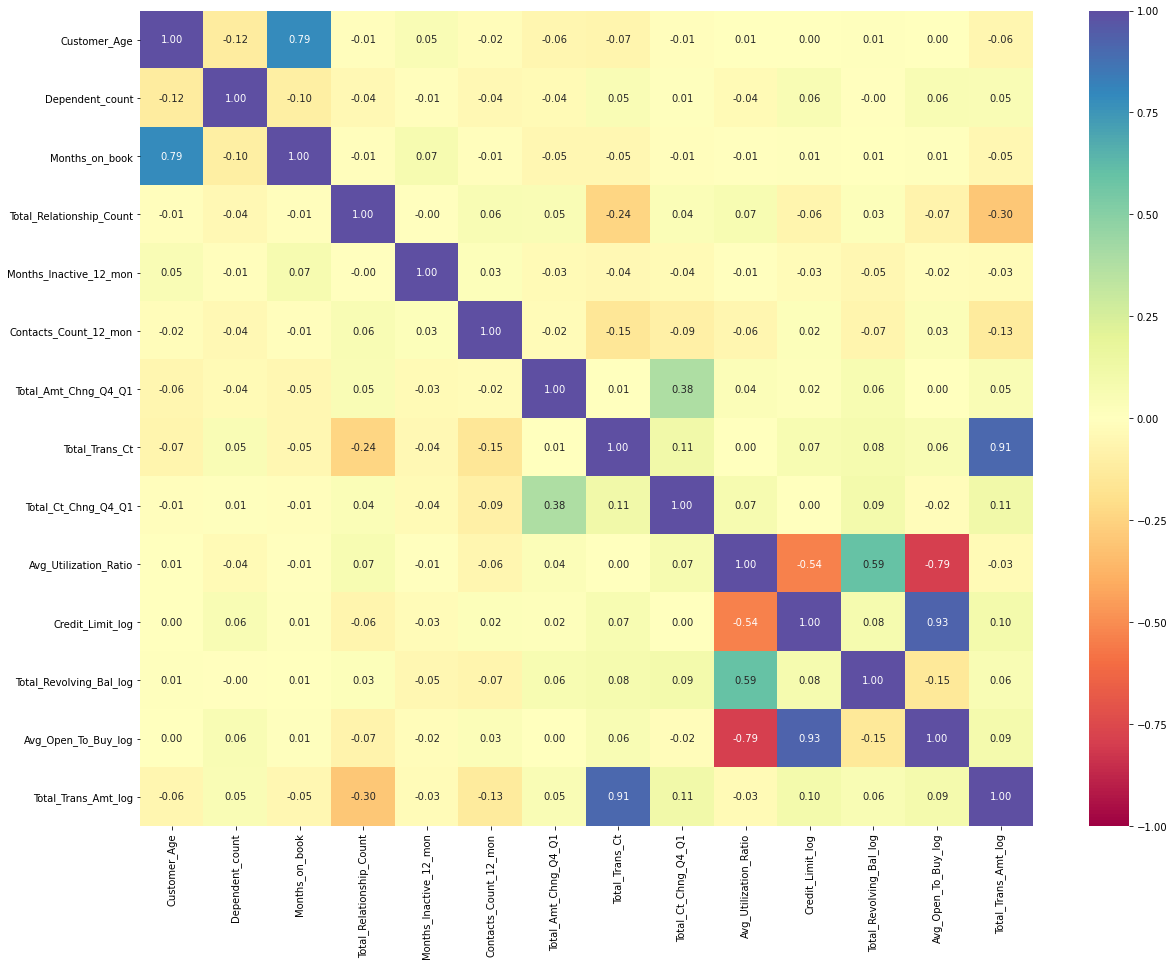

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**observations on heatmap**

* Customer age and months on book has high positive corelation 
* Total_Relationships Count has a slight negative corelation with Total Transaction Count and Total Transaction Amount
* Total Amount Chng Q4_Q1 has slight positive corealtion with Total_Ct_Chng_Q4_Q1
* Total Transaction count has high positive corelation with Total Transaction Amount 
* Avg Utilization Ratio has strong negative corelation with Avg_Open_To_Buy, Slight negative corelation with Credit_Limit and Positive relation with Total Revolving Balance
* Credit Limit Log has strong positive relation with Avg Open to Buy
* Total Trnsaction Amount has strong positve relation with Total Transaction count 


### Pair Plot 

<Figure size 2160x1080 with 0 Axes>

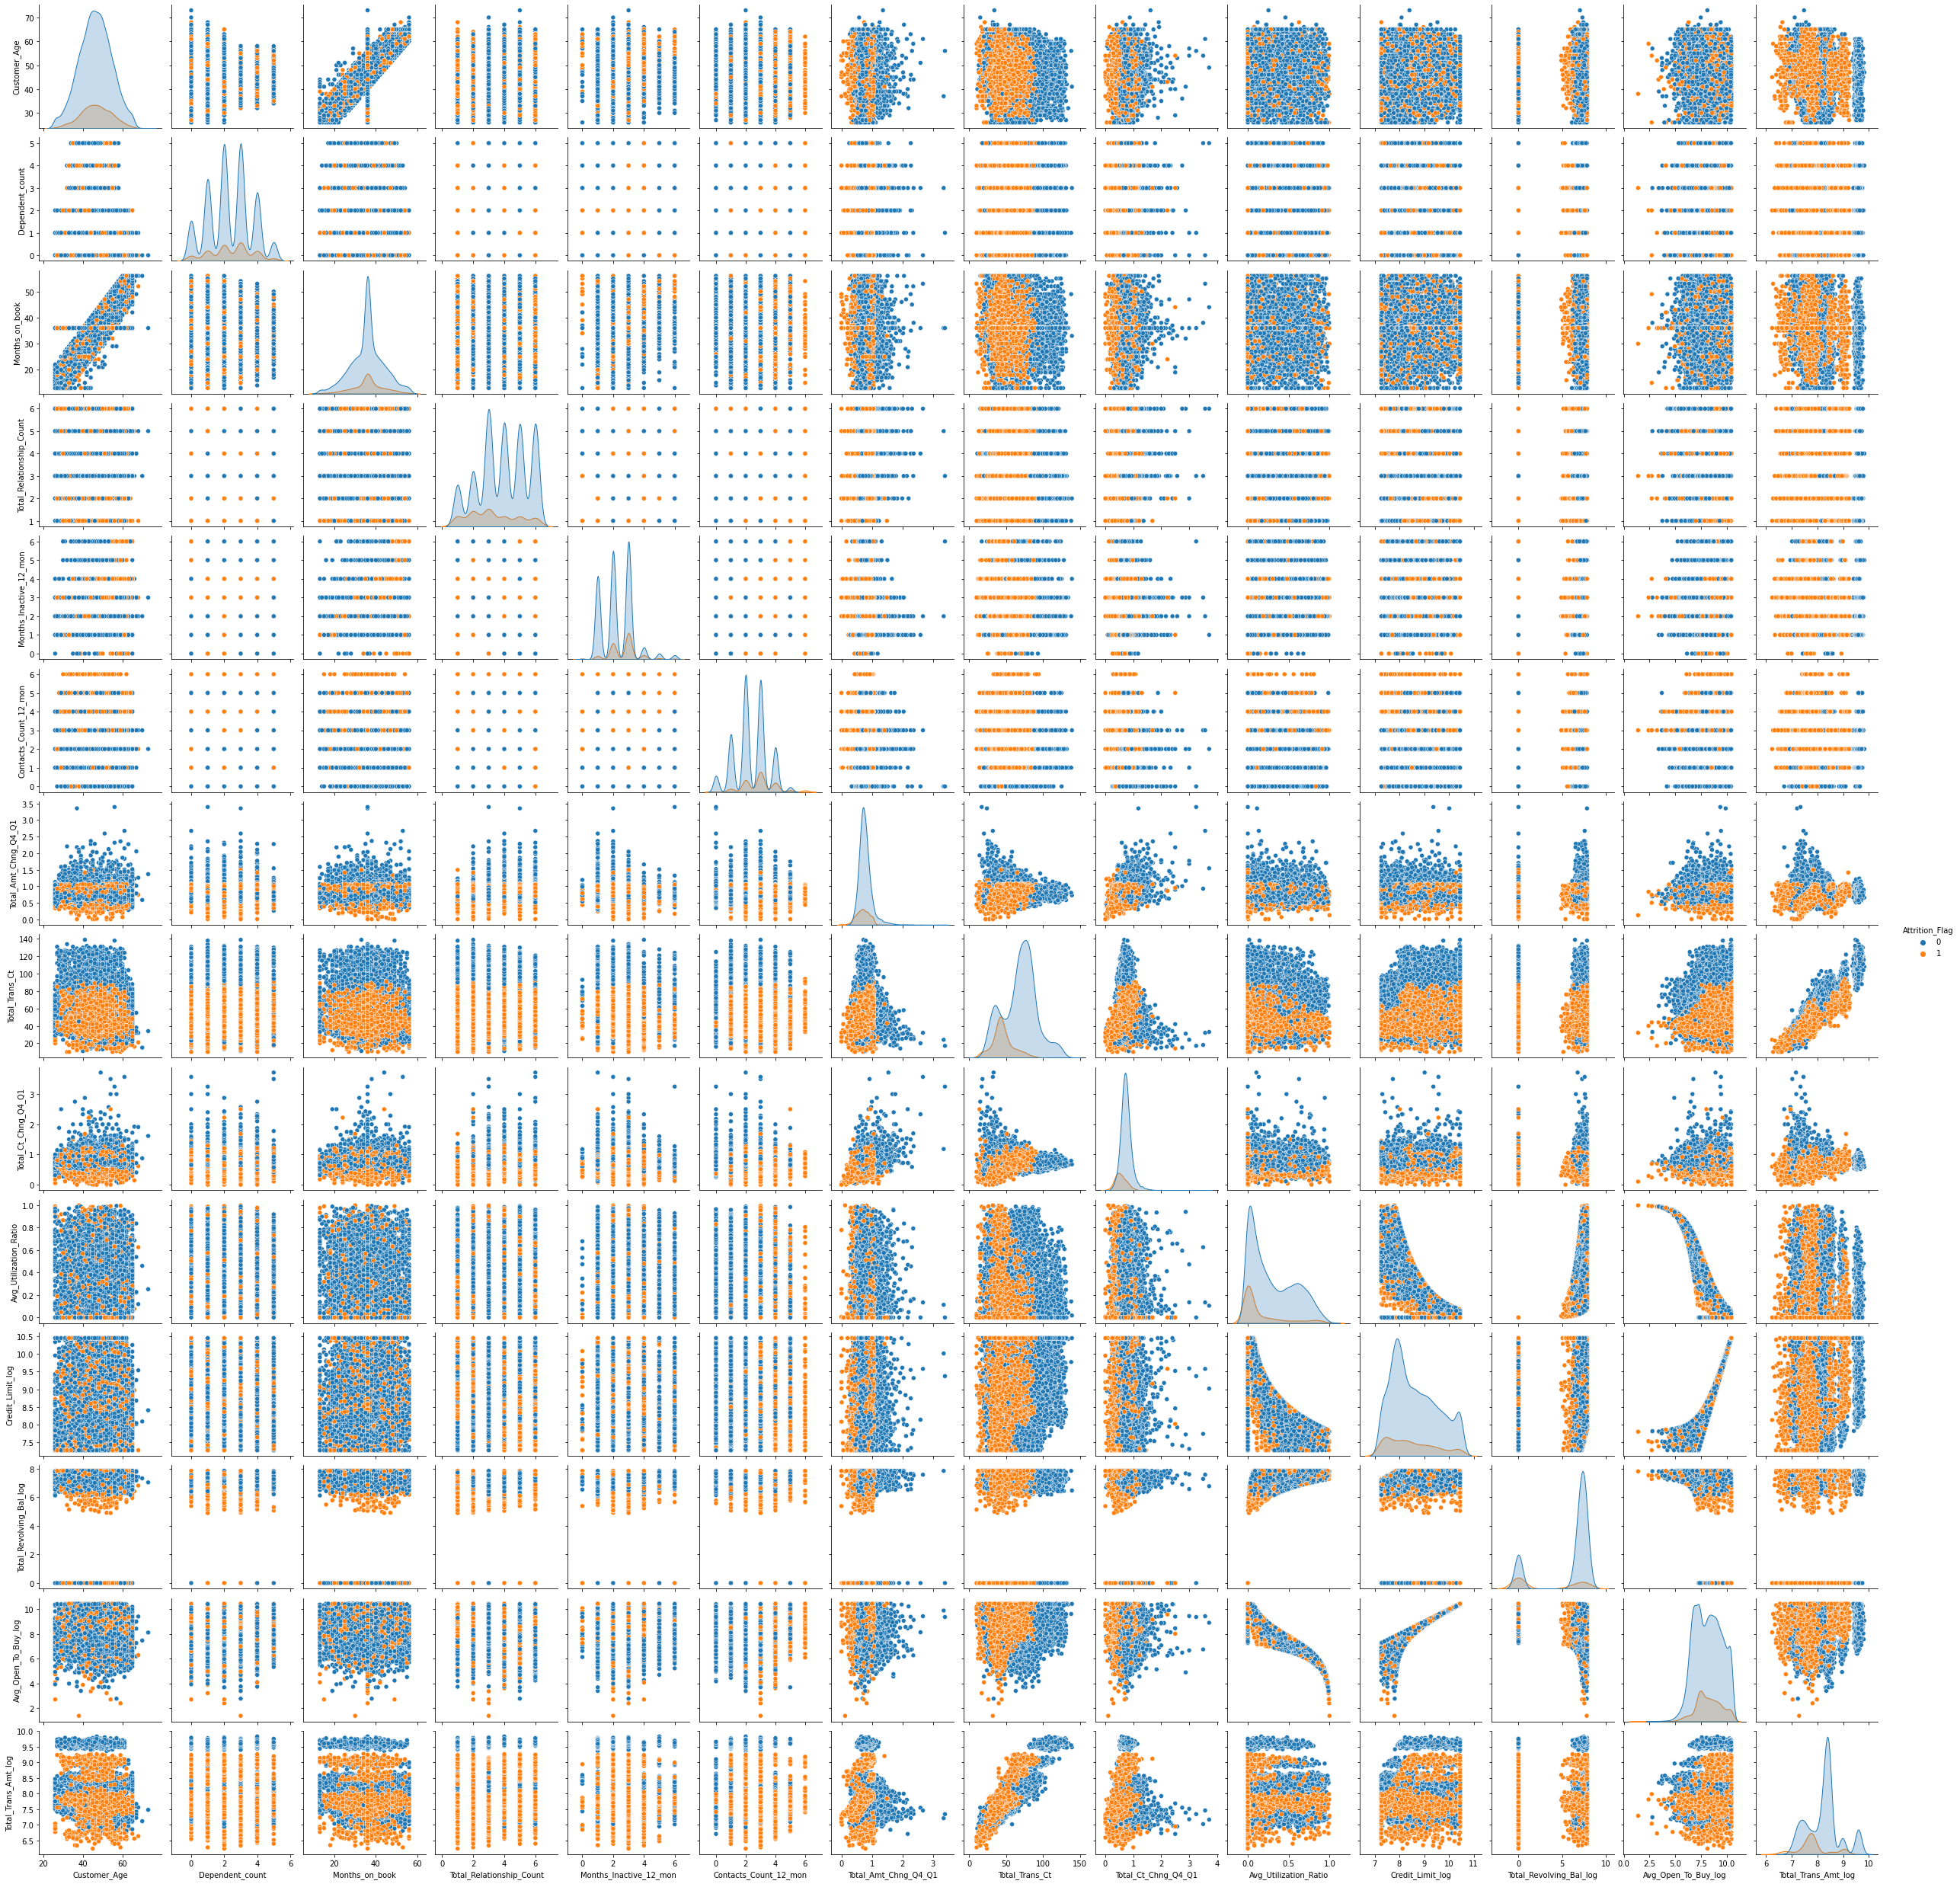

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(30, 15))
sns.pairplot(data, hue="Attrition_Flag")
plt.show()

**observations on pairplot**


* Customer_Age: Age is showing postive relation with Months on book, As age grows months on book also grows. Total Relation count 1, 2 and 4 Attire more than other dependent count. Also shows relation with Amount change Q4 and Q1, Total Transcation count  and Count change q4 and q1 and total transaction amount.
* Dependent_count: Lesser transaction count change q4_q1 and lessser transaction count attire more 
* Months_on_book: Times Contacted if high they attire, Lower Changes in Amount q4_q1 attire, less total trasnaction attire, less transaction count q4_q1 attire, And we see a spots of relation with total transaction amount on attire customer. 
* Total_Relationship_Count: Lower Total Amount change, Transaction count, total amount attire a lot with all relations counts, 
* Months_Inactive_12_mon: relation with high month on books attire a lot, Similar to other fields lower total Amount change, Transaction count, Total Transaction Amount has impact of attire 
* Contacts_Count_12_mon: High contact count on all age group, months on books, show high attire.
* Credit_Limit: show relation with Total Transaction couunt, Amount Change q4_q1, transaction count q4_q1 and amount spend, Show high positive relation with Average open to buy and negative relation on Avg Utilizing Ratio 
* Total_Revolving_Bal: has positive relation on avg utilization ratio, Negative relation of Avg Open to buy 
* Avg_Open_To_Buy:  Negative relation with Total Revolving balance, 
* Total_Trans_Amt: has positive relation with Total Trasnaction count, Scatter relation on all other fields
* Total_Trans_Ct: as positive relation with  Total_Trans_Amt and shows some relation with all features 
* Total_Ct_Chng_Q4_Q1: lesser customer age attire more, lesser months on books attire more, positve relation with total amount change q4_Q1, And lower avg open to buy and total transaction amount attire a lot 
* Total_Amt_Chng_Q4_Q1: lesser customer age attire more, lesser months on books attire more, positve relation with total amount change q4_Q1, And lower avg open to buy and total transaction amount attire a lot 
* Avg_Utilization_Ratio: Lower transaction count attire more, negative relation with credit limit and avg open to buy 

#### All feature are showing some relation with Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1,Total_Trans_Ct and Total_Trans_Amt - we have to study this more to understand 


## Checking High Corelated features

### Total_Trans_Amt_log vs Total_Trans_Ct

Genrating Charts for feature x : Total_Trans_Amt_log, y : Total_Trans_Ct


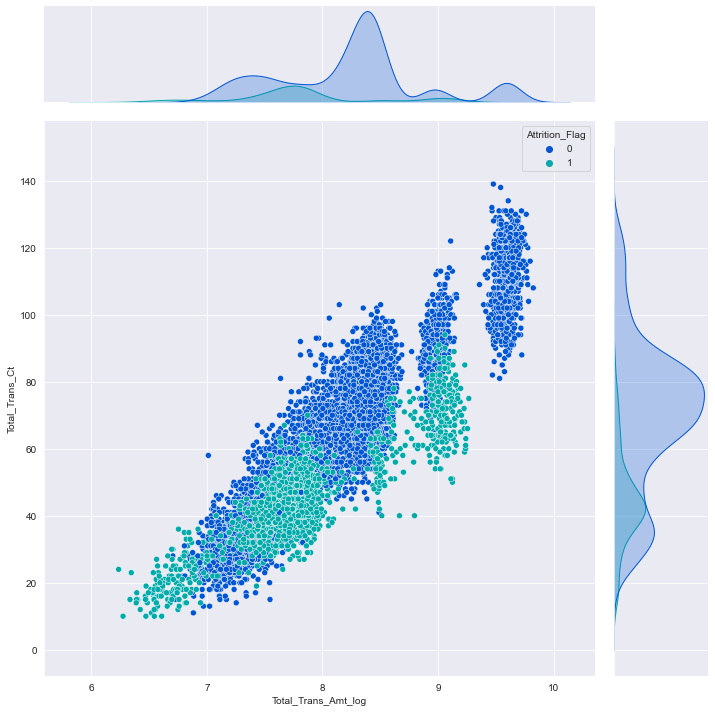

<IPython.core.display.Javascript object>

In [75]:
generate_bivariate_chart(
    xfeature="Total_Trans_Amt_log",
    yfeature="Total_Trans_Ct",
    data=data,
    hue="Attrition_Flag",
)

Genrating Charts for feature x : Credit_Limit_log, y : Avg_Open_To_Buy_log


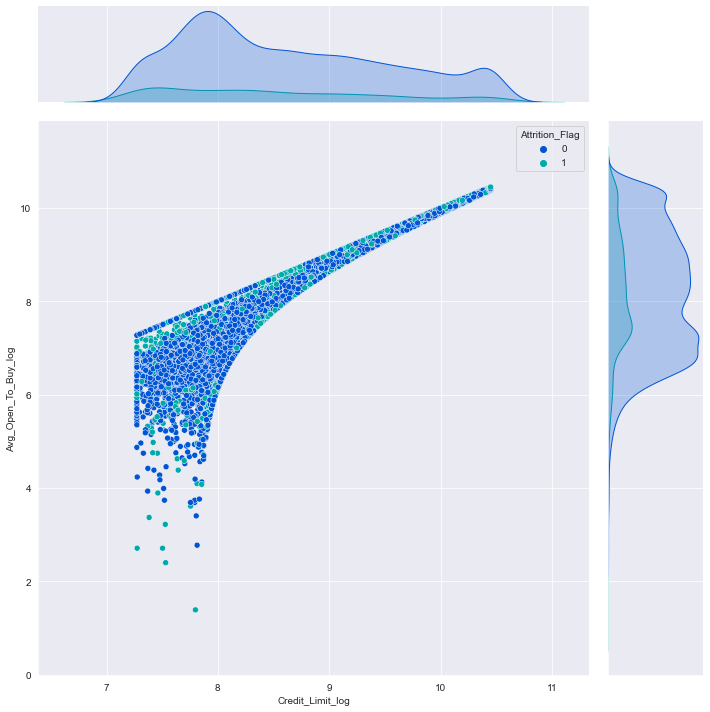

<IPython.core.display.Javascript object>

In [76]:
generate_bivariate_chart(
    xfeature="Credit_Limit_log",
    yfeature="Avg_Open_To_Buy_log",
    data=data,
    hue="Attrition_Flag",
)

Genrating Charts for feature x : Customer_Age, y : Months_on_book


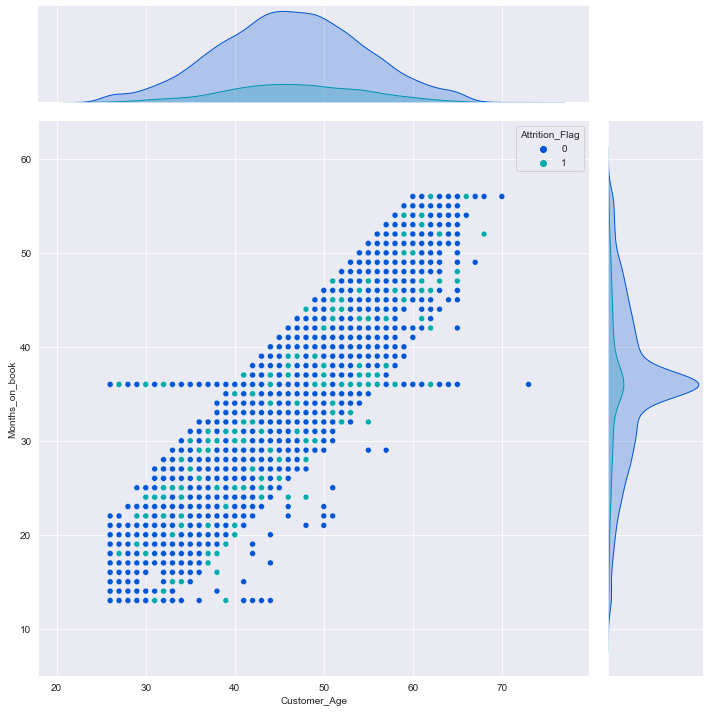

<IPython.core.display.Javascript object>

In [77]:
generate_bivariate_chart(
    xfeature="Customer_Age", yfeature="Months_on_book", data=data, hue="Attrition_Flag",
)

### Observations on high corelated features

* Credit_Limit_log is highly corelated with Avg_Open_To_Buy_log, we can drop one of the feature. We can retuan credit limit and drop Avg_Open_To_Buy_log
* Total_Trans_Amt_log is highly corelated with Total_Trans_Ct, we can drop one of the feature, we can reatian amount and drop transaction count 
* customer age and months on book also show high corelation but not signification so we can retain both features

### Dropping  highly corelated features

In [78]:
## droping high corelated features
data.drop("Total_Trans_Ct", axis=1, inplace=True)
data.drop("Avg_Open_To_Buy_log", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Dropping Contacts_Count_12_mon - since its past data

In [79]:
data.drop("Contacts_Count_12_mon", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64 
 13  Avg_Utilization_Ratio     10127 non-null  floa

<IPython.core.display.Javascript object>

### Checking Gender effects on Attrition

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


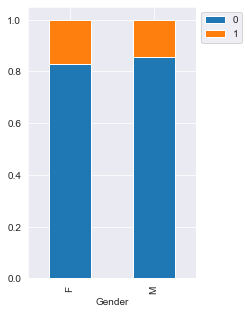

<IPython.core.display.Javascript object>

In [81]:
stacked_barplot(data, "Gender", "Attrition_Flag")

**We dont really see any significant effects on Attrition by Male or Female**

### Checking Education_Level effects on Attrition

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
Graduate         2641   487   3128
High School      1707   306   2013
Unknown          1263   256   1519
Uneducated       1250   237   1487
College           859   154   1013
Doctorate         356    95    451
Post-Graduate     424    92    516
------------------------------------------------------------------------------------------------------------------------


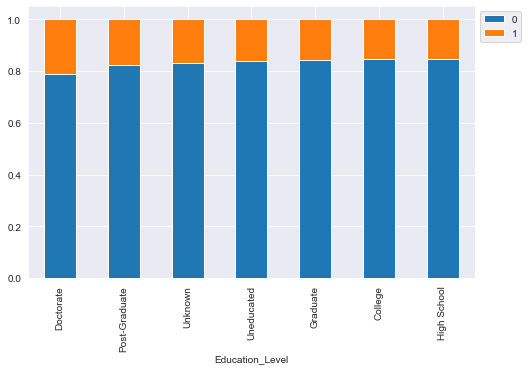

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* **Doctrate and Post Grad Attrition is little higher than other education level, But their total numbers are less compared to other levels**
* **All eduction levels has similar Attrition** 


### Checking Marital_Status effects on Attrition

Attrition_Flag     0     1    All
Marital_Status                   
All             8500  1627  10127
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
Divorced         627   121    748
------------------------------------------------------------------------------------------------------------------------


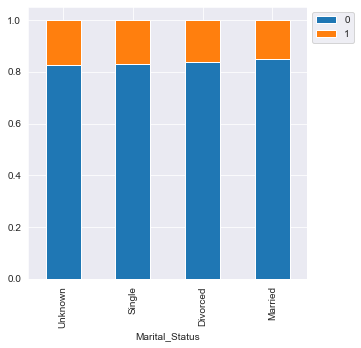

<IPython.core.display.Javascript object>

In [83]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* **All Marital_Status has similar % of Attrition** 


### Checking Income_Category effects on Attrition

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
Unknown           925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


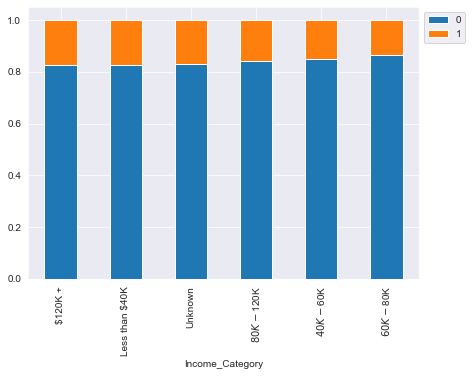

<IPython.core.display.Javascript object>

In [84]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* **All Income_Category has very similar % of Attrition** 


### Checking Card_Category effects on Attrition

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


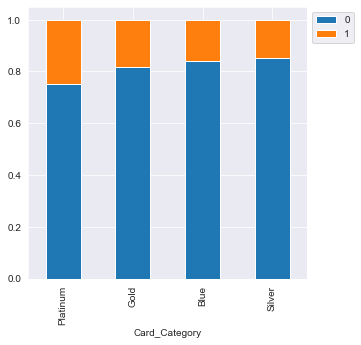

<IPython.core.display.Javascript object>

In [85]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* **Silver and Blue Card_CategorySilver and Blue has very similar % of Attrition** 
                            
* **Platinum and Gold has littler higher % than silver and blue but their overall volume contribution is not significant as blue category**


###   Attrition_Flag Vs Numerical Features                                                                                

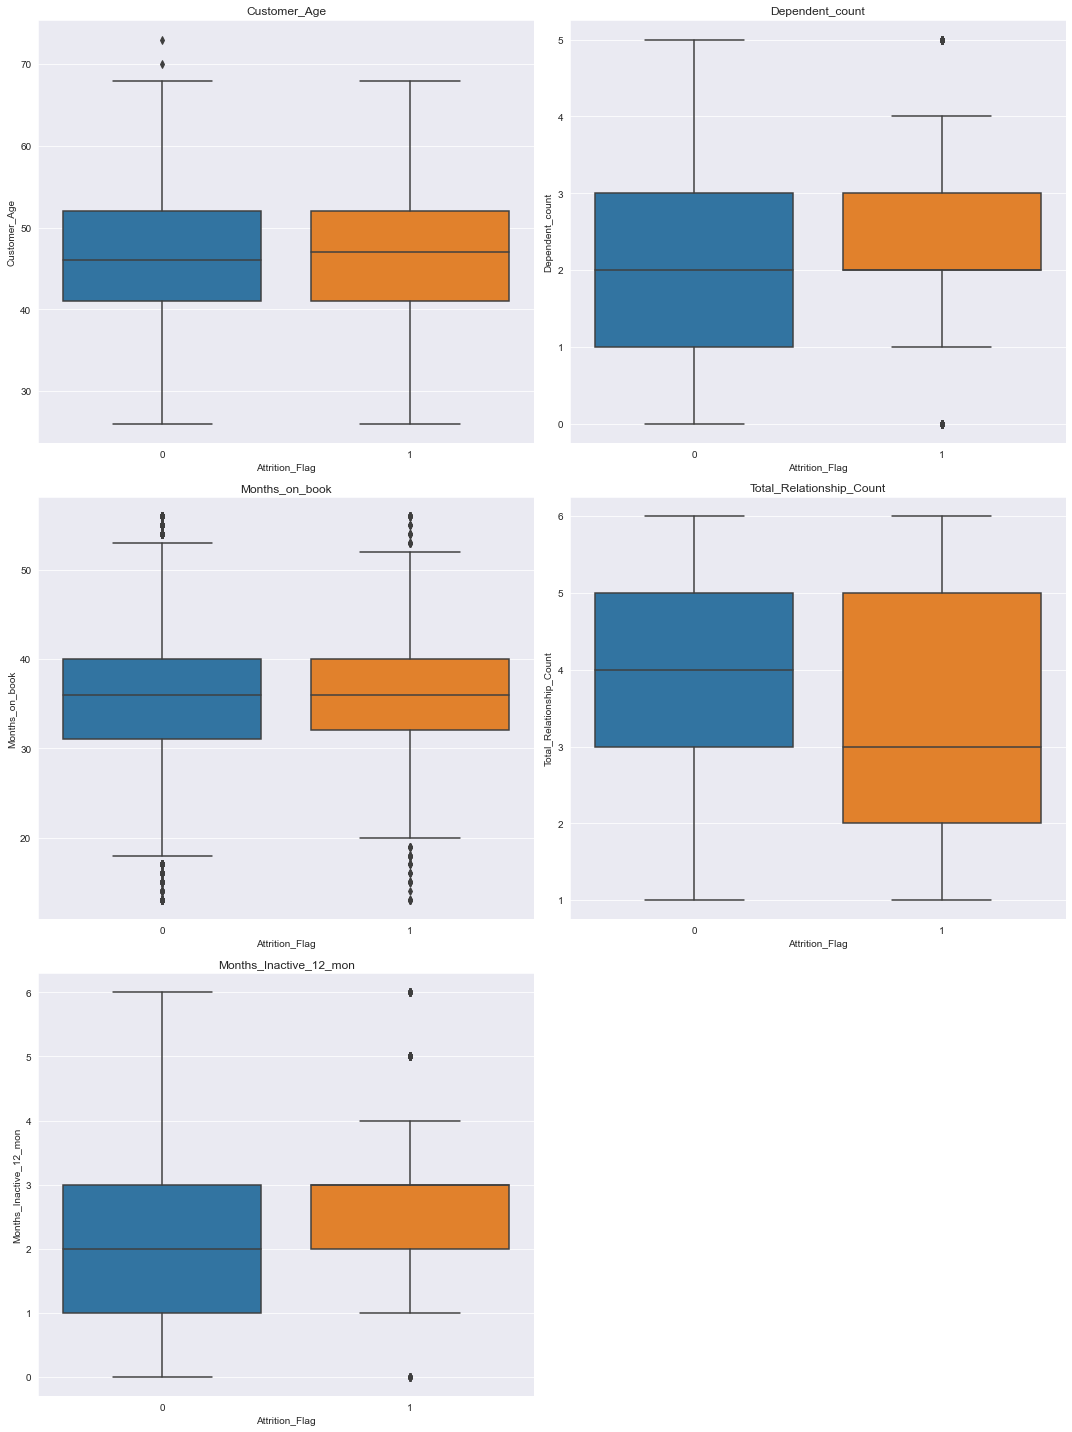

<IPython.core.display.Javascript object>

In [86]:
cols = data[
    [
        "Customer_Age",
        "Dependent_count",
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
    ]
].columns.tolist()
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

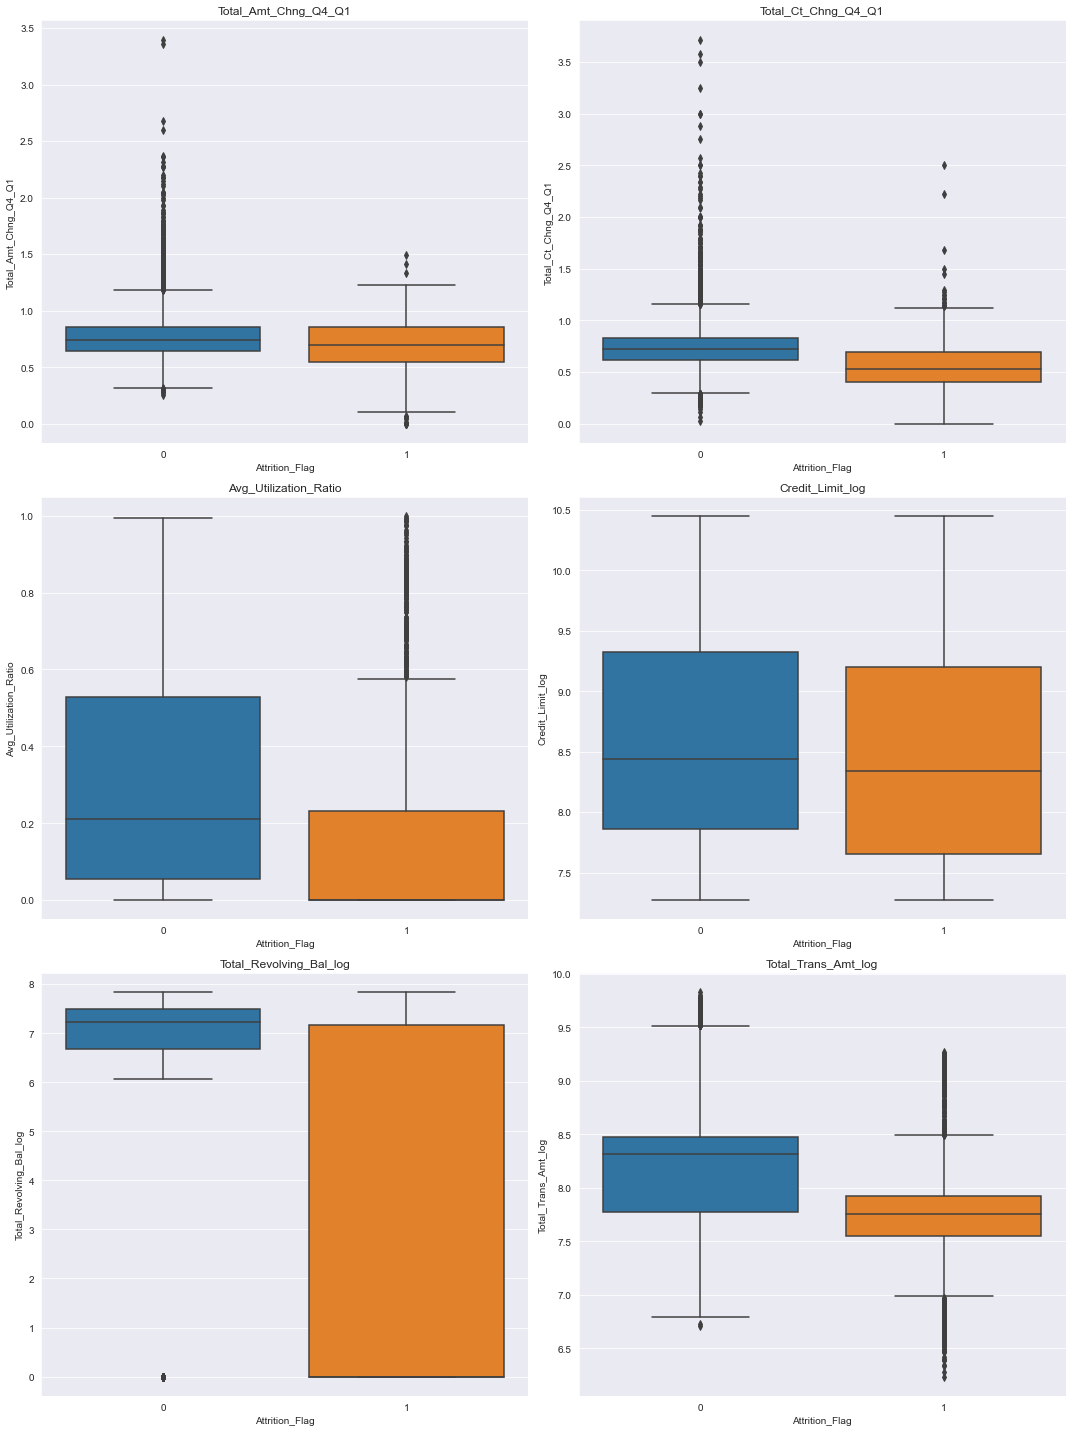

<IPython.core.display.Javascript object>

In [87]:
cols = data[
    [
        "Total_Amt_Chng_Q4_Q1",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
        "Credit_Limit_log",
        "Total_Revolving_Bal_log",
        "Total_Trans_Amt_log",
    ]
].columns.tolist()
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observations 

* Customer age, months on book does not have any effects on Attrition
* Dependents count, Card Relation counts, months inactive, bank contact counts all has some effects

* Total Amount Change q4_a1, transaction change q4_q1 has some effects on Attrition

* Avg Utilizaing ratio, Total Revolving balance, Total Transaction Amount, Credit limit has singificant impacts on Attrition

###   Attrition_Flag Vs Education & Income Features    with 


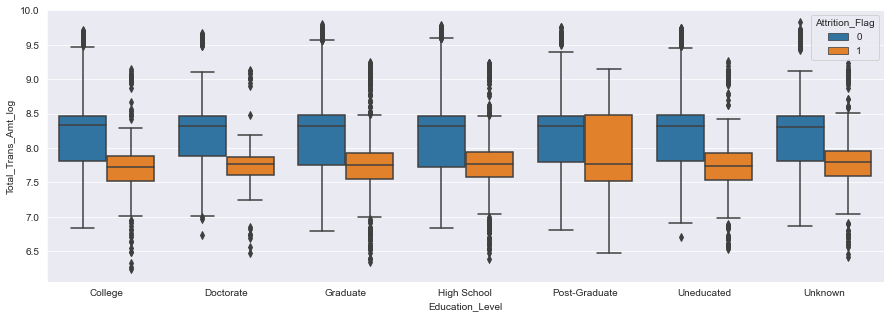

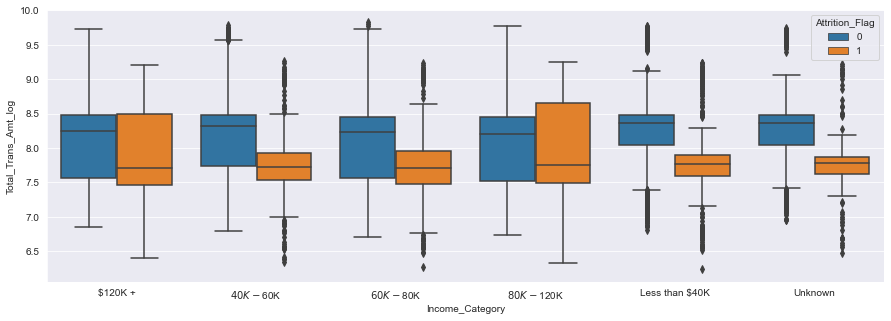

<IPython.core.display.Javascript object>

In [88]:


plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Education_Level"], data["Total_Trans_Amt_log"], hue=data["Attrition_Flag"]
)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Income_Category"], data["Total_Trans_Amt_log"], hue=data["Attrition_Flag"]
)
plt.show()




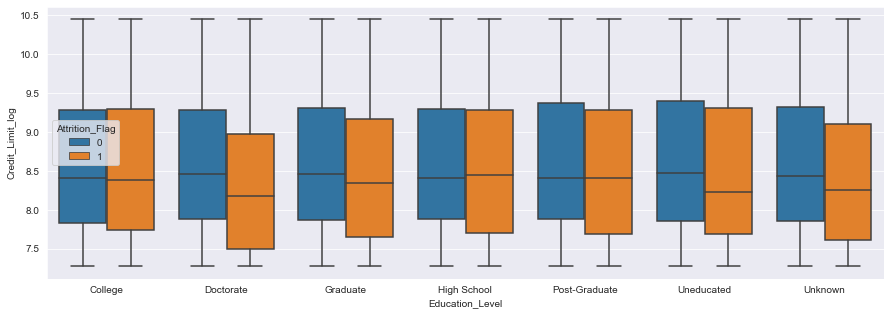

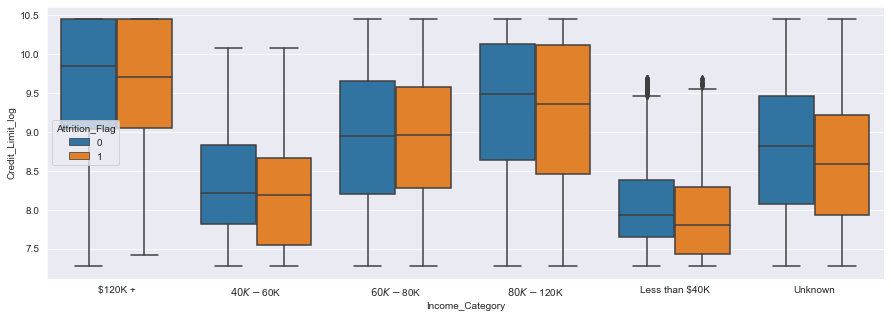

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Education_Level"], data["Credit_Limit_log"], hue=data["Attrition_Flag"]
)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Income_Category"], data["Credit_Limit_log"], hue=data["Attrition_Flag"]
)
plt.show()

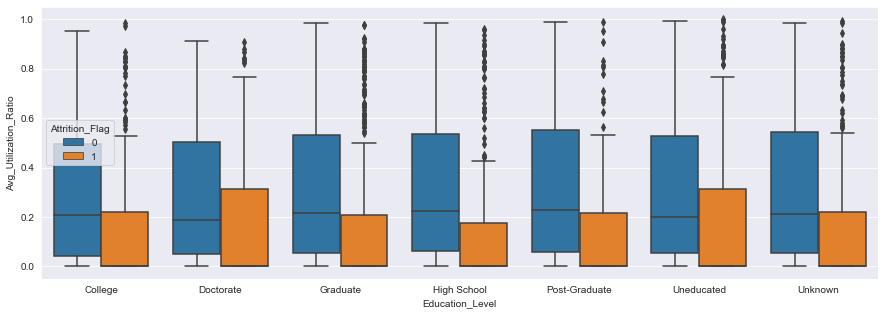

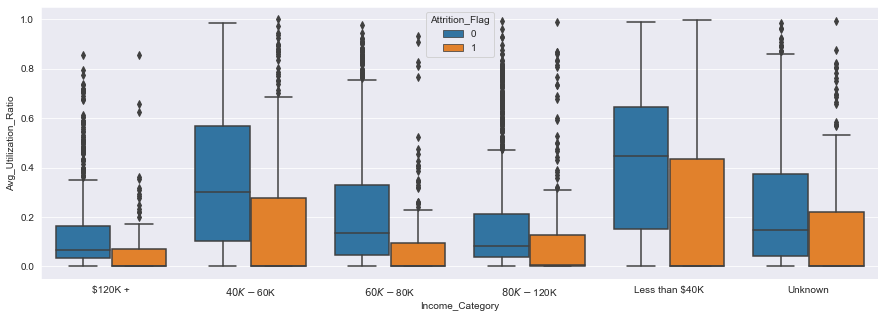

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Education_Level"], data["Avg_Utilization_Ratio"], hue=data["Attrition_Flag"]
)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Income_Category"], data["Avg_Utilization_Ratio"], hue=data["Attrition_Flag"]
)
plt.show()

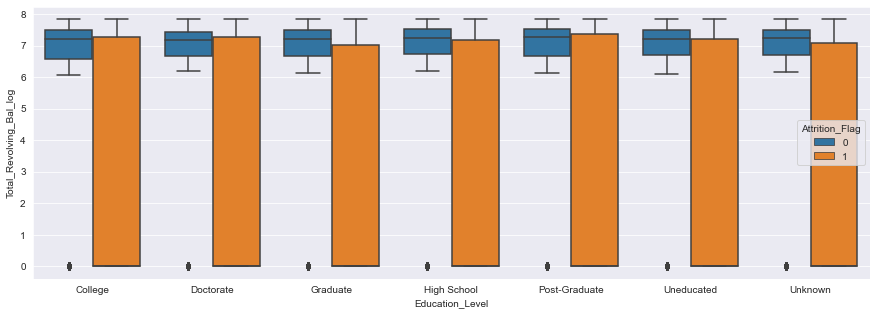

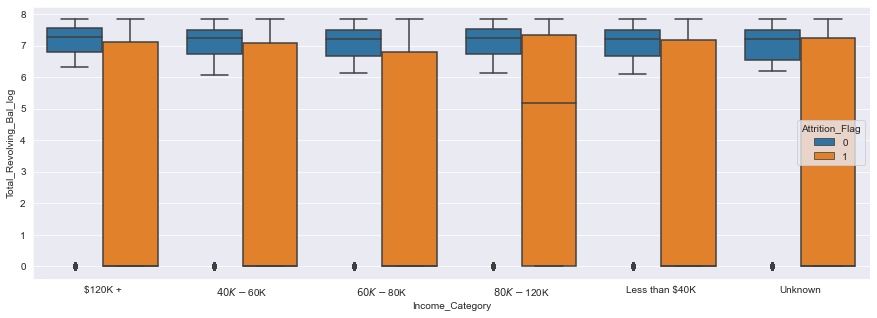

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Education_Level"], data["Total_Revolving_Bal_log"], hue=data["Attrition_Flag"]
)
plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(
    data["Income_Category"], data["Total_Revolving_Bal_log"], hue=data["Attrition_Flag"]
)
plt.show()

### Observations 

* very significant impacts with Total Revolving balance on Attrition with both income and education level
* significant impacts with Avg_Utilization_Ratio on Attrition with both income and education level
* smallimpacts with Credit_Limit_log and Total Transaction amount on Attrition with both income and education level



### Summary Missing Value/Outlier/Feature Engineering Treatments

* No missing Values on numerical features, Category features had missing and invalid cateory on income, education level and marital status, We have created a new category called `Unknown` for those. We did not drop any data. 
* All Outliers are treated with data transformation, All data has been changed to `log transformation` to handle data skewness. 
* Highly `Corelated feaures` are dropped.


## Model Building - Approach

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will close the card and the customer doesn't close - Loss of resources
2. Predicting a customer will not close the card and the customer close card - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not closed the card but closes the card i.e. losing on a potential source of income for the bank.

#### How to reduce this loss i.e need to reduce False Negatives?
* Bank wants Recall to be maximized, greater the Recall lesser the chances of false negatives.


1. Data preparation
2. Partition the data into train, validation and test set.
3. Build 6 model on the train data with regular, oversampled and undersampled data.
4. Pick 3 best models and hypertune parameters the models.
5. Pick Best model and score against test set
6. Productionalize model - implement steps with pipeline

## Data Preparation for Modeling

In [92]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]
print(f"Shape of X: {X.shape}, And Y: {Y.shape}")
print("Y feature, counts of label 'Yes': {}".format(sum(Y == 1)))
print("Y feature, counts of label 'No': {} \n".format(sum(Y == 0)))

Shape of X: (10127, 16), And Y: (10127,)
Y feature, counts of label 'Yes': 1627
Y feature, counts of label 'No': 8500 



<IPython.core.display.Javascript object>

In [93]:
Y.value_counts(normalize=True)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [94]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)


(6075, 16) (2026, 16) (2026, 16)


<IPython.core.display.Javascript object>

In [95]:
y_train.value_counts(normalize=True)

0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [96]:
y_val.value_counts(normalize=True)

0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [97]:
y_test.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

### Creating Dummy Variables

In [98]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)
print(f"After one hot encoding - Shape of X: {X_train.shape}")

(6075, 29) (2026, 29) (2026, 29)
After one hot encoding - Shape of X: (6075, 29)


<IPython.core.display.Javascript object>

## Building the model

**Let's start by building different models using KFold and cross_val_score and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

### Importing Libraries & Methods to track Recall/Accuracy/Confusion Matrix

In [99]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

### Building Methods to Score/Confusion matrix

In [100]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(name, model,train_x_data,train_y_data,val_x_data,val_y_data):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #print(f"Model '{name}' performance \n\n")

    predictors_train = train_x_data
    target_train = train_y_data

    predictors_test = val_x_data
    target_test = val_y_data

    # predicting training data using the independent variables
    pred_train = model.predict(predictors_train)

    acc_train = accuracy_score(target_train, pred_train)  # to compute Accuracy
    recall_train = recall_score(target_train, pred_train)  # to compute Recall
    precision_train = precision_score(target_train, pred_train)  # to compute Precision
    f1_train = f1_score(target_train, pred_train)  # to compute F1-score
    roc_train = roc_auc_score(target_train, pred_train)  # to compute ROC AUC

    # predicting test data using the independent variables
    pred_test = model.predict(predictors_test)

    acc_test = accuracy_score(target_test, pred_test)  # to compute Accuracy
    recall_test = recall_score(target_test, pred_test)  # to compute Recall
    precision_test = precision_score(target_test, pred_test)  # to compute Precision
    f1_test = f1_score(target_test, pred_test)  # to compute F1-score
    roc_test = roc_auc_score(target_test, pred_test)  # to compute ROC AUC

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        [
            {
                "Model": name,
                "Data":"Training",
                "Data Shape":train_x_data.shape,
                "Recall": np.round_(recall_train * 100, decimals=3),
                "F1-Score": np.round_(f1_train * 100, decimals=3),
                "Accuracy": np.round_(acc_train * 100, decimals=3),
                "Precision": np.round_(precision_train * 100, decimals=3),
                "ROC-AUC": np.round_(roc_train * 100, decimals=3),
            },{  "Model": name,
                "Data":"Validation/Test",
                "Data Shape":val_x_data.shape,
                "Recall": np.round_(recall_test * 100, decimals=3),
                "F1-Score": np.round_(f1_test * 100, decimals=3),
                "Accuracy": np.round_(acc_test * 100, decimals=3),
                "Precision": np.round_(precision_test * 100, decimals=3),
                "ROC-AUC": np.round_(roc_test * 100, decimals=3),
            },
        ]
    )
    return df_perf

def confusion_matrix_classification(name, model,train_x_data,train_y_data,val_x_data,val_y_data):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    sns.set_context(
        "paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
    )
    print(f"Model '{name}' confusion matrix \n\n")

    predictors_train = train_x_data
    target_train = train_y_data

    predictors_test = val_x_data
    target_test = val_y_data
    #predictors_output = test_y_data.copy()

    y_pred_train = model.predict(predictors_train)
    y_pred_test = model.predict(predictors_test)

    cm_train = confusion_matrix(target_train, y_pred_train)
    cm_test = confusion_matrix(target_test, y_pred_test)

    #predictors_output['Orig'] = target_test
    #predictors_output['Model'] = y_pred_test

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True

    f, axes = plt.subplots(1, 2)

    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_train.flatten().sum())
            ]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

    labels_test = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / cm_test.flatten().sum())
            ]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)

    g = sns.heatmap(cm_train, annot=labels, fmt="", ax=axes[0])
    g.set(xlabel="True label", ylabel="Predicted label", title="Training Data")

    g1 = sns.heatmap(cm_test, annot=labels_test, fmt="", ax=axes[1])
    g1.set(xlabel="True label", ylabel="Predicted label", title="Validation/Test Data")




<IPython.core.display.Javascript object>

### Building 6 Models with Basic tuning parameters

**To avoid overfit on decision tree and random forests** 

In [101]:
#method that builds 6 moldes and print their scores, metrics and performance in a box plot 

def build_models_and_score(data_type, t_x_data, t_y_data, v_x_data, v_y_data):
    models = []  # Empty list to store all the models
    models_scores = []  # Empty list to store all the models
    # Appending models into the list

    models.append(
        (
            "LR " + data_type,
            LogisticRegression(
                solver="newton-cg", penalty="none", verbose=False, n_jobs=-1
            ),
        )
    )

    models.append(
        (
            "DT " + data_type,
            DecisionTreeClassifier(
                random_state=1, criterion="gini", max_depth=50, max_leaf_nodes=10,
            ),
        )
    )
    
    models.append(
        (
            "Bag-DT " + data_type,
            BaggingClassifier(
                base_estimator=DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=50, max_leaf_nodes=10), random_state=1,n_jobs=-1,n_estimators=100
            ),
        )
    )
     
    models.append(
        ("RF " + data_type, RandomForestClassifier(random_state=1, n_estimators=100,n_jobs=-1, max_leaf_nodes=10))
    )

    models.append(("GBC " + data_type, GradientBoostingClassifier(random_state=1,n_estimators=100)))

    models.append(("ABC " + data_type, AdaBoostClassifier(random_state=1,n_estimators=100)))

    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models

    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance:" "\n")

    for name, model in models:
        # scoring = "accuracy"
        # scoring = "balanced_accuracy"
        # scoring = "f1_weighted"
        #scoring = "recall_weighted"
        scoring = "recall"
        # scoring = "roc_auc"
        kfold = StratifiedKFold(
            n_splits=10, shuffle=True, random_state=1
        )  # Setting number of splits equal to 10
        cv_result = cross_val_score(
            estimator=model, X=t_x_data, y=t_y_data, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {}".format(name, cv_result.mean() * 100))

    print("\n" "All Model Performance:" "\n")

    for name, model in models:
        model.fit(t_x_data, t_y_data)
        # models_scores.append(model_performance_classification(name, model, X_train, y_train, X_val, y_val))
        #print(f"\nModel Performance: {name}\n")
        display(
            model_performance_classification(
                name, model, t_x_data, t_y_data, v_x_data, v_y_data
            )
        )
    
    # Plotting boxplots for CV scores of all models defined above
    #plt.figure(figsize=(20, 13))
    plt.rcParams["figure.figsize"] = [20, 13]
    sns.set(font_scale = 1.5)
    fig = plt.figure()
    plt.rcParams["figure.autolayout"] = True
    fig.suptitle("Algorithm Comparison for "+ data_type)
    ax = fig.add_subplot(111)

    plt.boxplot(results)
    plt.xticks(rotation=45)
    ax.set_xticklabels(names)

    plt.show()


<IPython.core.display.Javascript object>

### Running 6 models with - Regular Data


Cross-Validation Performance:

LR Regular Data: 41.899852724594986
DT Regular Data: 58.913317904481374
Bag-DT Regular Data: 60.75846833578792
RF Regular Data: 28.071744161582156
GBC Regular Data: 75.61119293078056
ABC Regular Data: 74.47822427940248

All Model Performance:



Model             Data  Data Shape  Recall  F1-Score  Accuracy  \
0  LR Regular Data         Training  (6075, 29)  42.520    54.605    88.642   
1  LR Regular Data  Validation/Test  (2026, 29)  47.853    59.429    89.487   

   Precision  ROC-AUC  
0     76.287   69.995  
1     78.392   72.662

Model             Data  Data Shape  Recall  F1-Score  Accuracy  \
0  DT Regular Data         Training  (6075, 29)  62.602    68.806    90.881   
1  DT Regular Data  Validation/Test  (2026, 29)  69.325    71.293    91.017   

   Precision  ROC-AUC  
0     76.375   79.448  
1     73.377   82.251

Model             Data  Data Shape  Recall  F1-Score  \
0  Bag-DT Regular Data         Training  (6075, 29)  61.373    68.418   
1  Bag-DT Regular Data  Validation/Test  (2026, 29)  66.871    70.209   

   Accuracy  Precision  ROC-AUC  
0    90.897     77.290   78.961  
1    90.869     73.898   81.171

Model             Data  Data Shape  Recall  F1-Score  Accuracy  \
0  RF Regular Data         Training  (6075, 29)  30.840    46.024    88.379   
1  RF Regular Data  Validation/Test  (2026, 29)  33.436    49.099    88.845   

   Precision  ROC-AUC  
0     90.663   65.116  
1     92.373   66.453

Model             Data  Data Shape  Recall  F1-Score  Accuracy  \
0  GBC Regular Data         Training  (6075, 29)  82.480    87.595    96.247   
1  GBC Regular Data  Validation/Test  (2026, 29)  84.969    88.076    96.298   

   Precision  ROC-AUC  
0     93.387   90.681  
1     91.419   91.720

Model             Data  Data Shape  Recall  F1-Score  Accuracy  \
0  ABC Regular Data         Training  (6075, 29)  77.254    80.945    94.156   
1  ABC Regular Data  Validation/Test  (2026, 29)  80.368    81.366    94.077   

   Precision  ROC-AUC  
0     85.006   87.323  
1     82.390   88.537

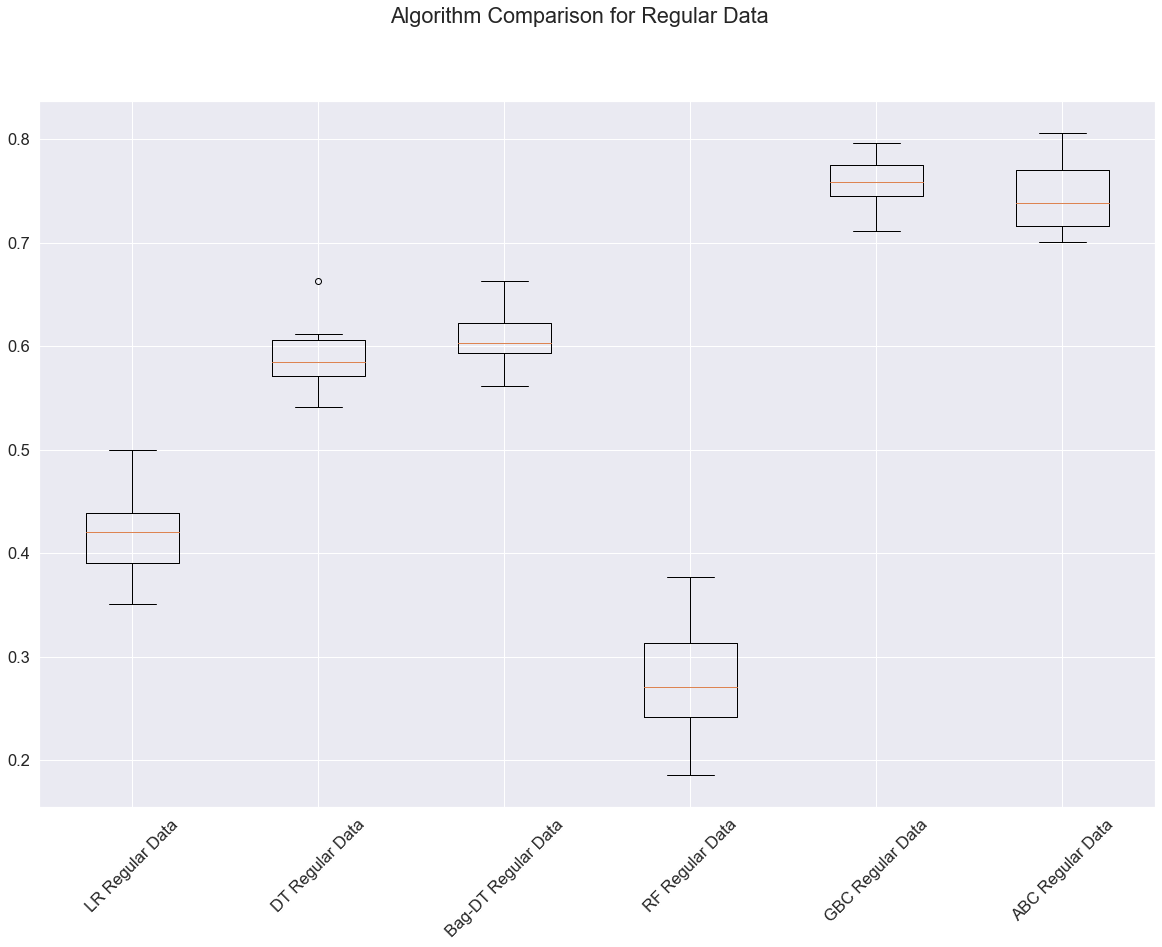

<IPython.core.display.Javascript object>

In [102]:
build_models_and_score("Regular Data", X_train, y_train, X_val, y_val)

### Models Performance Summary - Regular data 

* `Logistic Regression` - Model did not overfit, But very low recall and f1 score. 
* `Decision Tree Classifier` - Model did not overfit, Decent Recall and F1 Score, Scores can be improved with Tuning Parameters. 
* `Bagging Classifier` - Model did not overfit, Decent Recall and F1 Score, Scores can be improved with Tuning Parameters. 
* `Random Forest Classifier` - Model did not overfit, Very good Accuracy but very low Recall scores.
* `Gradient Boosting Classifier` - Model did not overfit, Great Recall scores and all other scores Accuracy and F1 Score also good.
* `AdaBoost Classifier` - Model did not overfit, good recall scores and all other scores Accuracy and F1 Score also good.

#### Best Models with Regular data

* `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier`


### Oversampling train data using SMOTE

In [103]:
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [104]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

### Running 6 models with - Over Sampled Data


Cross-Validation Performance:

LR Over Sampled Data: 86.40891405678187
DT Over Sampled Data: 78.34851111367927
Bag-DT Over Sampled Data: 79.87857775723256
RF Over Sampled Data: 84.82037058438307
GBC Over Sampled Data: 93.70488077352748
ABC Over Sampled Data: 92.68500327439423

All Model Performance:



Model             Data   Data Shape  Recall  F1-Score  \
0  LR Over Sampled Data         Training  (10198, 29)  86.586    88.397   
1  LR Over Sampled Data  Validation/Test   (2026, 29)  57.362    55.738   

   Accuracy  Precision  ROC-AUC  
0    88.635     90.286   88.635  
1    85.341     54.203   74.034

Model             Data   Data Shape  Recall  F1-Score  \
0  DT Over Sampled Data         Training  (10198, 29)  78.721    84.381   
1  DT Over Sampled Data  Validation/Test   (2026, 29)  79.755    70.365   

   Accuracy  Precision  ROC-AUC  
0    85.429     90.917   85.429  
1    89.191     62.954   85.377

Model             Data   Data Shape  Recall  F1-Score  \
0  Bag-DT Over Sampled Data         Training  (10198, 29)  80.173    84.901   
1  Bag-DT Over Sampled Data  Validation/Test   (2026, 29)  81.595    70.651   

   Accuracy  Precision  ROC-AUC  
0    85.742     90.223   85.742  
1    89.092     62.295   86.062

Model             Data   Data Shape  Recall  F1-Score  \
0  RF Over Sampled Data         Training  (10198, 29)  85.291    87.024   
1  RF Over Sampled Data  Validation/Test   (2026, 29)  83.129    66.996   

   Accuracy  Precision  ROC-AUC  
0    87.282     88.828   87.282  
1    86.821     56.108   85.329

Model             Data   Data Shape  Recall  F1-Score  \
0  GBC Over Sampled Data         Training  (10198, 29)  94.646    95.413   
1  GBC Over Sampled Data  Validation/Test   (2026, 29)  85.583    80.519   

   Accuracy  Precision  ROC-AUC  
0    95.450     96.193   95.450  
1    93.337     76.022   90.203

Model             Data   Data Shape  Recall  F1-Score  \
0  ABC Over Sampled Data         Training  (10198, 29)  93.293    93.476   
1  ABC Over Sampled Data  Validation/Test   (2026, 29)  80.982    74.894   

   Accuracy  Precision  ROC-AUC  
0    93.489     93.660   93.489  
1    91.264     69.657   87.108

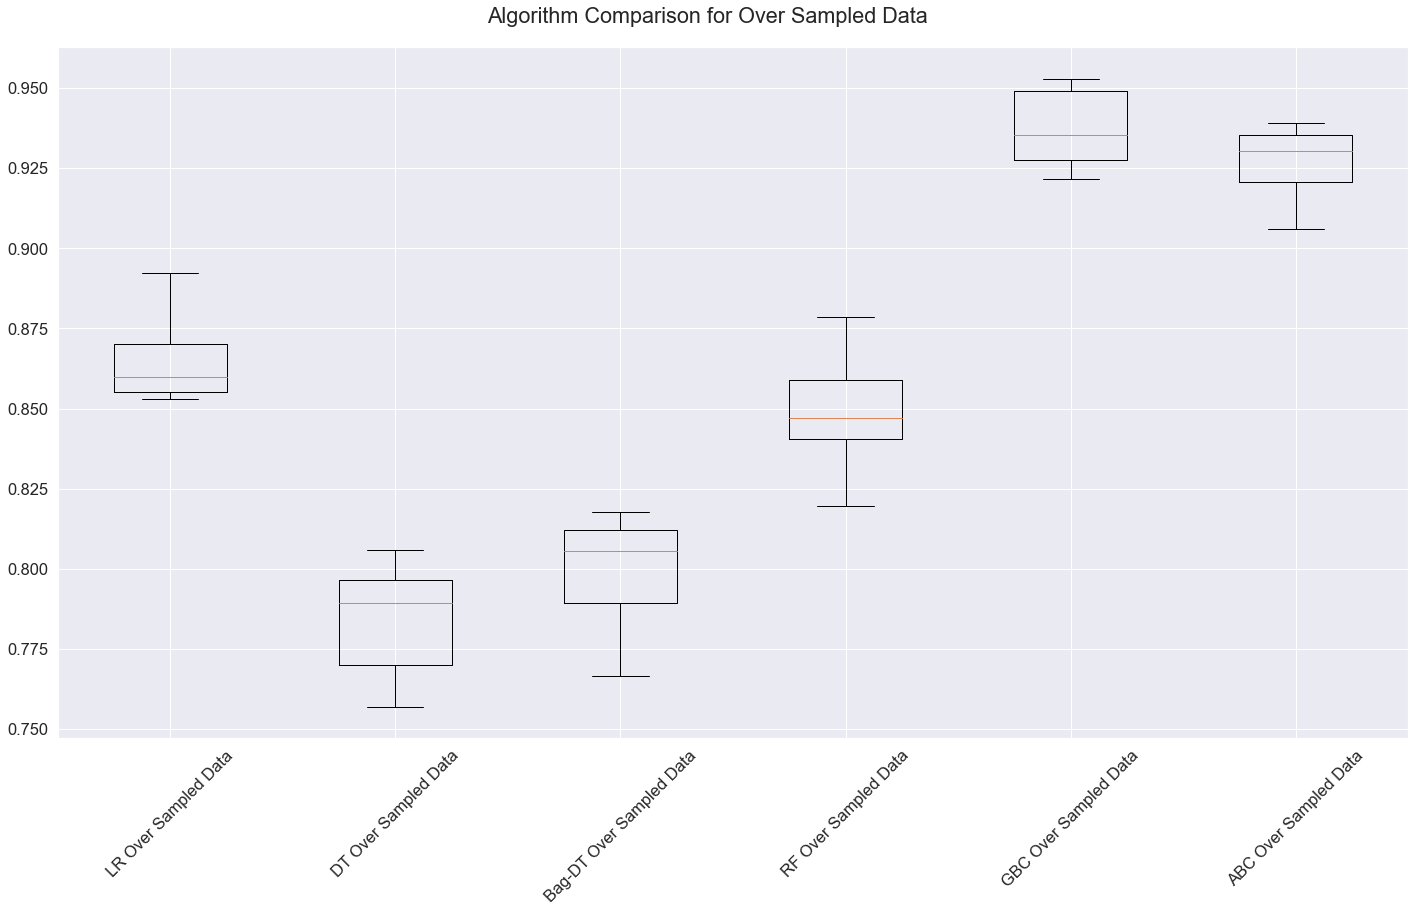

<IPython.core.display.Javascript object>

In [105]:
build_models_and_score("Over Sampled Data", X_train_over, y_train_over, X_val, y_val)

### Models Performance Summary - Over Sampled Data

* `Logistic Regression` - Model overfit, Recall scores poor in validation data set. 
* `Decision Tree Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `Bagging Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `Random Forest Classifier` - Model overfit, Good Accuracy and Recall scores. F1 Score is very bad on validation. 
* `Gradient Boosting Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `AdaBoost Classifier`  - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.

#### Best Models with Over Sampled Data

* All Models are overfit data, All performing well in traning but when checking against validation we see overfit on Recall or Fl or Accuracy or Precision


### Undersampling train data using Random Under Sampler

In [106]:
rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print(
    "After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_under == 0))
)

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

### Running 6 models with - Under Sampled Data


Cross-Validation Performance:

LR Under Sampled Data: 74.48558804965285
DT Under Sampled Data: 84.83904902167053
Bag-DT Under Sampled Data: 87.70039974752788
RF Under Sampled Data: 84.32463707132337
GBC Under Sampled Data: 92.82242794024826
ABC Under Sampled Data: 88.93014937933937

All Model Performance:



Model             Data  Data Shape  Recall  F1-Score  \
0  LR Under Sampled Data         Training  (1952, 29)  76.537    77.732   
1  LR Under Sampled Data  Validation/Test  (2026, 29)  76.994    51.434   

   Accuracy  Precision  ROC-AUC  
0    78.074     78.964   78.074  
1    76.604     38.615   76.762

Model             Data  Data Shape  Recall  F1-Score  \
0  DT Under Sampled Data         Training  (1952, 29)  85.963    87.533   
1  DT Under Sampled Data  Validation/Test  (2026, 29)  85.890    68.627   

   Accuracy  Precision  ROC-AUC  
0    87.756     89.160   87.756  
1    87.364     57.143   86.768

Model             Data  Data Shape  Recall  F1-Score  \
0  Bag-DT Under Sampled Data         Training  (1952, 29)  90.676    90.769   
1  Bag-DT Under Sampled Data  Validation/Test  (2026, 29)  90.184    70.929   

   Accuracy  Precision  ROC-AUC  
0    90.779     90.862   90.779  
1    88.105     58.449   88.945

Model             Data  Data Shape  Recall  F1-Score  \
0  RF Under Sampled Data         Training  (1952, 29)  86.988    87.166   
1  RF Under Sampled Data  Validation/Test  (2026, 29)  87.117    64.545   

   Accuracy  Precision  ROC-AUC  
0    87.193     87.346   87.193  
1    84.600     51.264   85.617

Model             Data  Data Shape  Recall  F1-Score  \
0  GBC Under Sampled Data         Training  (1952, 29)  97.234    96.199   
1  GBC Under Sampled Data  Validation/Test  (2026, 29)  94.479    79.177   

   Accuracy  Precision  ROC-AUC  
0    96.158     95.186   96.158  
1    92.004     68.142   93.004

Model             Data  Data Shape  Recall  F1-Score  \
0  ABC Under Sampled Data         Training  (1952, 29)  93.340    93.197   
1  ABC Under Sampled Data  Validation/Test  (2026, 29)  92.331    73.594   

   Accuracy  Precision  ROC-AUC  
0    93.186     93.054   93.186  
1    89.339     61.179   90.548

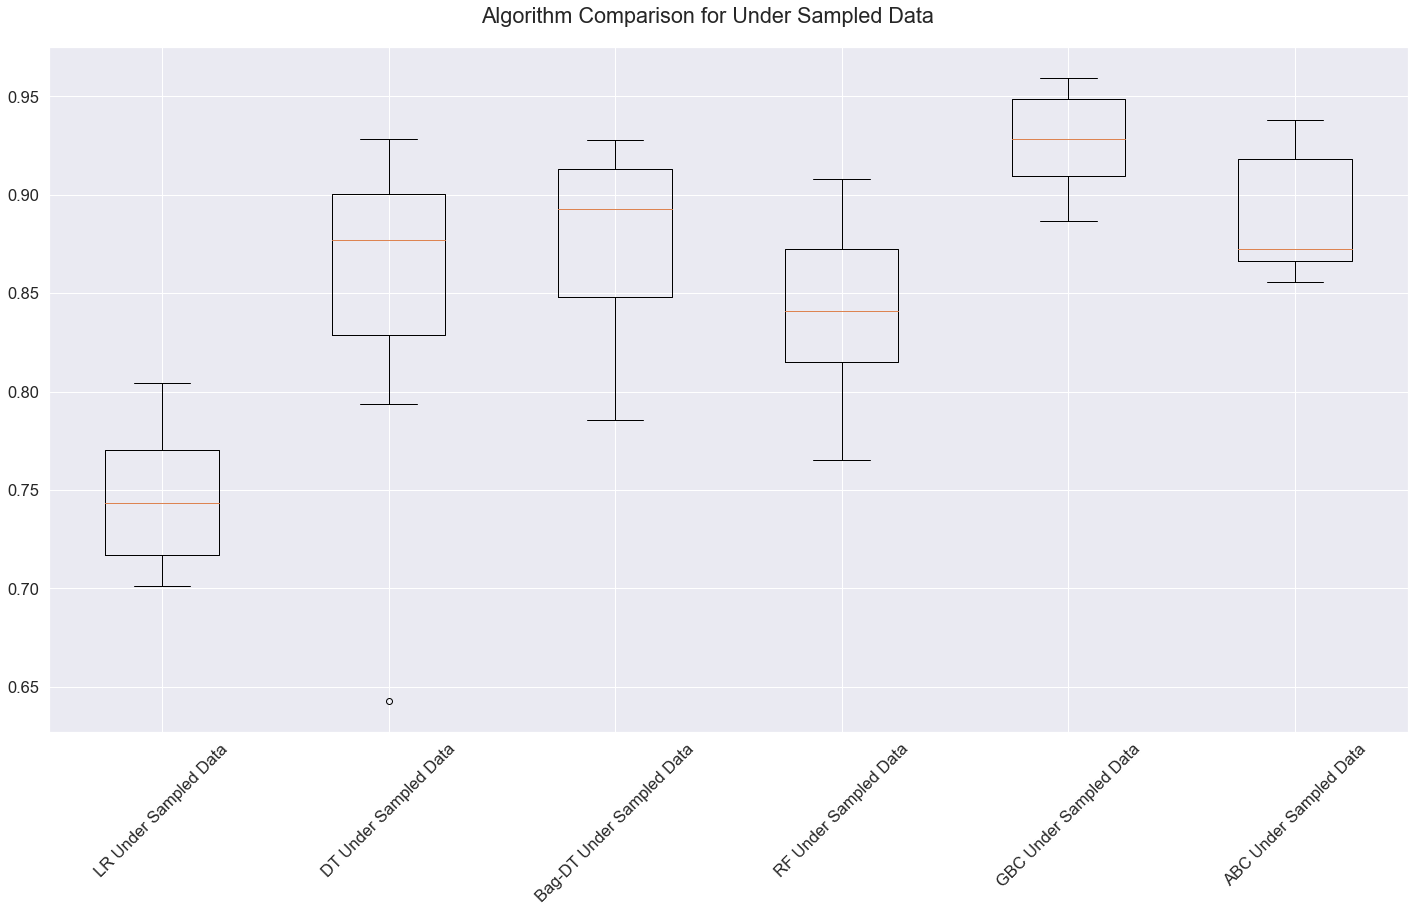

<IPython.core.display.Javascript object>

In [107]:
build_models_and_score("Under Sampled Data", X_train_under, y_train_under, X_val, y_val)

### Models Performance Summary - Under Sampled Data

* `Logistic Regression` - Model overfit, Recall scores are good but other scores are bad in validation data set. 
* `Decision Tree Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `Bagging Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `Random Forest Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `Gradient Boosting Classifier` - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.
* `AdaBoost Classifier`  - Model overfit slightly, Great Recall scores and all other scores Accuracy and F1 Score also good but all scores showing overfit.

#### Best Models with Under Sampled Data

* All Models are overfit data, All models has good recall scores but other scores are over fit. All performing well in traning but when checking against validation we see overfit on Recall or Fl or Accuracy or Precision


### Three Best Models out of 18 Models

##### All Models on Over Sampling and Under Sampling shows overfit


* `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier` with regular data is best models  out of 18 Models we tried. 

- We can see that the `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier` is giving the highest cross-validated recall compared to other models and no overfitting on Accuracy, Precision and F1 scores.

- The boxplot shows that the performance of  `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier`  is consistent and their performance on the validation set is also good

- We will tune the best three models i.e.  `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier`  and see if the performance improves 

## Hyperparameter Tuning

**We will tune `Decision Tree Classifier`, `Bagging Classifier` and `Gradient Boosting Classifier` models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

## Decision Tree - Tuning Model

### Common Parameters grid for GridSearchCV & RandomizedSearchCV

In [108]:
# Parameter grid to pass in GridSearchCV & RandomizedSearchCV

parameters_dt = {
    "max_depth": [np.arange(2, 50, 5), None],
    "class_weight" : [{0: 0.20, 1: 0.80},{0: 0.30, 1: 0.70},"balanced"],
    "criterion": ["gini","entropy"],
    "splitter": ["best", "random"],
    "max_features": [0.5,0.6,0.7,0.8,0.9,1.0,"auto", "sqrt", "log2" ],
    "min_impurity_decrease":[0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "max_leaf_nodes": [np.arange(1, 20, 1), None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)


kfold = StratifiedKFold(
    n_splits=10, shuffle=True, random_state=1
)  # Setting number of splits equal to 10


model_params = DecisionTreeClassifier()
print(f"Model supported Parameter : ")
model_params.get_params()


Model supported Parameter : 


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

<IPython.core.display.Javascript object>

### Validating with GridSearchCV

Fitting 10 folds for each of 15120 candidates, totalling 151200 fits

Best Parameters:{'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0005, 'min_samples_leaf': 5, 'splitter': 'best'} 
Score: 0.920829630191624


Model             Data  Data Shape  Recall  F1-Score  \
0  Tuned DT - GridSearchCV         Training  (6075, 29)  94.877    87.276   
1  Tuned DT - GridSearchCV  Validation/Test  (2026, 29)  88.344    80.785   

   Accuracy  Precision  ROC-AUC  
0    95.556     80.803   95.281  
1    93.238     74.419   91.260

Model 'Tuned DT - GridSearchCV' confusion matrix 




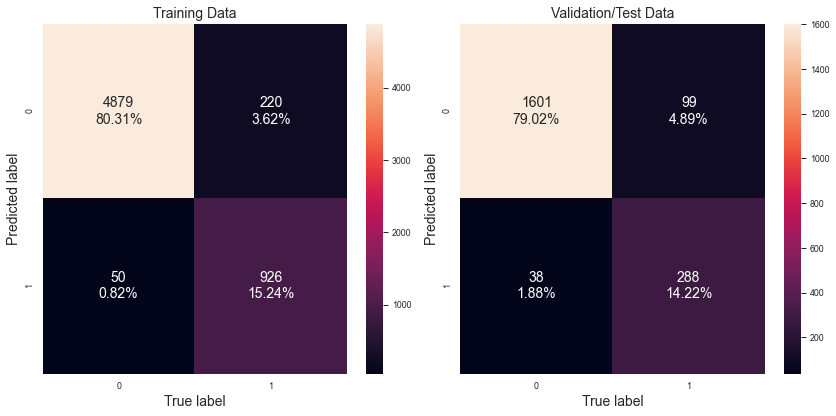

<IPython.core.display.Javascript object>

In [109]:
# model = DecisionTreeClassifier(random_state=1, class_weight={0: 0.20, 1: 0.80})
model = DecisionTreeClassifier(random_state=1)

# Calling GridSearchCV
grid_cv = GridSearchCV(
    estimator=model,
    param_grid=parameters_dt,
    scoring=scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "\nBest Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


best_model_dt_grid = grid_cv.best_estimator_

# Fit the best algorithm to the data.
best_model_dt_grid.fit(X_train, y_train)

display(
    model_performance_classification(
        "Tuned DT - GridSearchCV", best_model_dt_grid, X_train, y_train, X_val, y_val
    )
)

confusion_matrix_classification(
    "Tuned DT - GridSearchCV", best_model_dt_grid, X_train, y_train, X_val, y_val
)

### Validating with RandomizedSearchCV

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters are {'splitter': 'best', 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0015, 'max_leaf_nodes': None, 'max_features': 0.5, 'max_depth': None, 'criterion': 'entropy', 'class_weight': {0: 0.3, 1: 0.7}} with CV score=0.9041923176970433:


Model             Data  Data Shape  Recall  \
0  Tuned DT - RandomizedSearchCV         Training  (6075, 29)  87.193   
1  Tuned DT - RandomizedSearchCV  Validation/Test  (2026, 29)  79.141   

   F1-Score  Accuracy  Precision  ROC-AUC  
0    81.552    93.663     76.598   91.047  
1    72.779    90.474     67.363   85.894

Model 'Tuned DT - RandomizedSearchCV' confusion matrix 




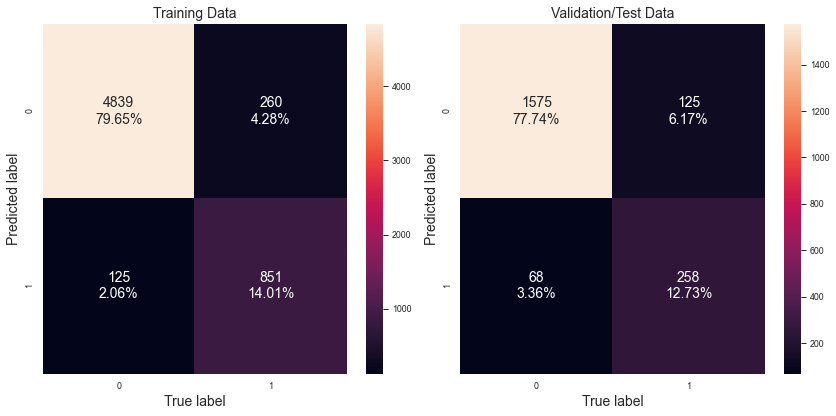

<IPython.core.display.Javascript object>

In [110]:
# model = DecisionTreeClassifier(random_state=1, class_weight={0: 0.20, 1: 0.80})
model = DecisionTreeClassifier(random_state=1)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters_dt,
    n_iter=100,
    scoring=scorer,
    random_state=1,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


best_model_dt_rand = randomized_cv.best_estimator_
# Fit the best algorithm to the data.
best_model_dt_rand.fit(X_train, y_train)
display(
    model_performance_classification(
        "Tuned DT - RandomizedSearchCV",
        best_model_dt_rand,
        X_train,
        y_train,
        X_val,
        y_val,
    )
)

confusion_matrix_classification(
    "Tuned DT - RandomizedSearchCV", best_model_dt_rand, X_train, y_train, X_val, y_val
)

## Bagging Classifier - Tuning Model

### Common Parameters grid for GridSearchCV & RandomizedSearchCV

In [111]:


# Parameter grid to pass in GridSearchCV & RandomizedSearchCV
cl1 = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters_bg = {
          'base_estimator':[cl1],
          'max_samples': [0.7,0.8,0.9,1], 
          'max_features': [0.7,0.8,0.9,1],
          'n_estimators': [50,100,150,200],
          "bootstrap": [True, False],
          "bootstrap_features": [True, False]
         }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5

model_params = BaggingClassifier()
print(f"Model supported Parameter : ")
model_params.get_params()





Model supported Parameter : 


{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<IPython.core.display.Javascript object>

### Validating with GridSearchCV

Fitting 5 folds for each of 256 candidates, totalling 1280 fits

Best Parameters:{'base_estimator': DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 200} 
Score: 0.7581946624803767


Model             Data  Data Shape  Recall  F1-Score  \
0  Bagging - GridSearchCV         Training  (6075, 29) 100.000   100.000   
1  Bagging - GridSearchCV  Validation/Test  (2026, 29)  81.902    83.307   

   Accuracy  Precision  ROC-AUC  
0   100.000    100.000  100.000  
1    94.719     84.762   89.539

Model 'Bagging - GridSearchCV' confusion matrix 




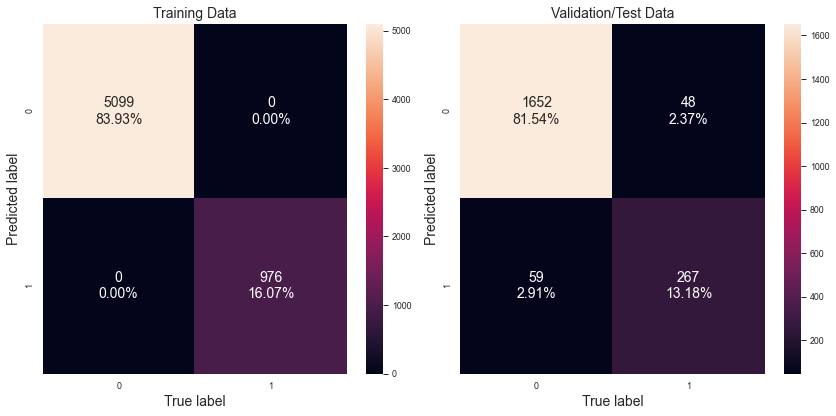

<IPython.core.display.Javascript object>

In [112]:


# Calling GridSearchCV
grid_cv = GridSearchCV(
    estimator=BaggingClassifier(random_state=1),
    param_grid=parameters_bg,
    scoring=scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "\nBest Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


best_model_bag_grid = grid_cv.best_estimator_

# Fit the best algorithm to the data.
best_model_bag_grid.fit(X_train, y_train)

display(
    model_performance_classification(
        "Bagging - GridSearchCV", best_model_bag_grid, X_train, y_train, X_val, y_val
    )
)

confusion_matrix_classification(
    "Bagging - GridSearchCV", best_model_bag_grid, X_train, y_train, X_val, y_val
)


### Validating with RandomizedSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'n_estimators': 150, 'max_samples': 0.9, 'max_features': 0.9, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator': DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)} with CV score=0.7520460491889063:


Model             Data  Data Shape  Recall  \
0  Bagging - RandomizedSearchCV         Training  (6075, 29) 100.000   
1  Bagging - RandomizedSearchCV  Validation/Test  (2026, 29)  81.902   

   F1-Score  Accuracy  Precision  ROC-AUC  
0   100.000   100.000    100.000  100.000  
1    83.438    94.768     85.032   89.569

Model 'Bagging - RandomizedSearchCV' confusion matrix 




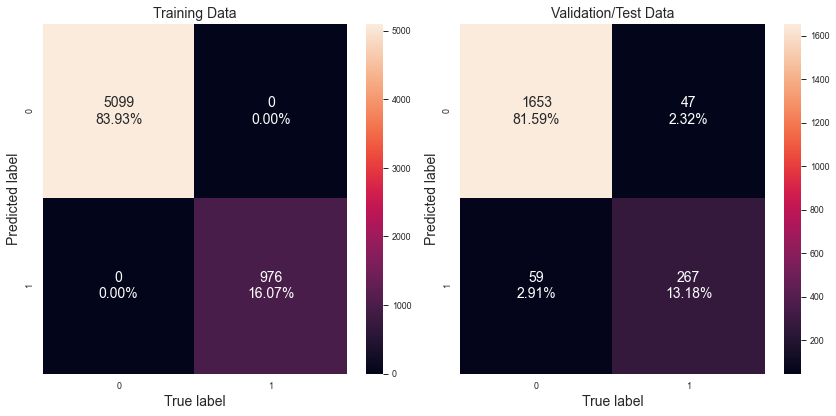

<IPython.core.display.Javascript object>

In [113]:
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=BaggingClassifier(random_state=1),
    param_distributions=parameters_bg,
    n_iter=20,
    scoring=scorer,
    random_state=1,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


best_model_bag_rand = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
best_model_bag_rand.fit(X_train, y_train)

display(
    model_performance_classification(
        "Bagging - RandomizedSearchCV",
        best_model_bag_rand,
        X_train,
        y_train,
        X_val,
        y_val,
    )
)

confusion_matrix_classification(
    "Bagging - RandomizedSearchCV", best_model_bag_rand, X_train, y_train, X_val, y_val
)

## Gradient Boosting Classifier - Tuning Model

### Common Parameters grid for GridSearchCV & RandomizedSearchCV

#### Let’s first fit a gradient boosting classifier with default parameters to get a baseline idea of the performance

In [114]:
model = GradientBoostingClassifier(random_state=1)
model = model.fit(X_train, y_train)


display(
    model_performance_classification(
        "Gradient Boosting  - Base Model", model, X_train, y_train, X_val, y_val,
    )
)

Model             Data  Data Shape  Recall  \
0  Gradient Boosting  - Base Model         Training  (6075, 29)  82.480   
1  Gradient Boosting  - Base Model  Validation/Test  (2026, 29)  84.969   

   F1-Score  Accuracy  Precision  ROC-AUC  
0    87.595    96.247     93.387   90.681  
1    88.076    96.298     91.419   91.720

<IPython.core.display.Javascript object>

#### Base Model does not overfit, But we want to improve performance 



In [115]:

model_params = GradientBoostingClassifier(random_state=1)
print(f"Model supported Parameter : ")
model_params.get_params()


Model supported Parameter : 


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

<IPython.core.display.Javascript object>

In [116]:


learning_rates = [1, 0.50,0.1,0.09,0.05]
n_estimators = [50, 100,125]
max_depths = [3,5,7]

# Grid of parameters to choose from
parameters_gb = {
                    "learning_rate":learning_rates,
                    "n_estimators":n_estimators,
                    'max_depth':max_depths,
                    "subsample":[0.5, 0.8, 0.9, 0.95, 1.0],
                    
                }

print(f"parameters_gb : {parameters_gb}")


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5





parameters_gb : {'learning_rate': [1, 0.5, 0.1, 0.09, 0.05], 'n_estimators': [50, 100, 125], 'max_depth': [3, 5, 7], 'subsample': [0.5, 0.8, 0.9, 0.95, 1.0]}


<IPython.core.display.Javascript object>

### Validating with GridSearchCV

Fitting 5 folds for each of 225 candidates, totalling 1125 fits

Best Parameters:{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0} with CV score: 0.9565432098765433


Model             Data  Data Shape  Recall  \
0  Gradient Boosting  - GridSearchCV         Training  (6075, 29)  95.799   
1  Gradient Boosting  - GridSearchCV  Validation/Test  (2026, 29)  85.890   

   F1-Score  Accuracy  Precision  ROC-AUC  
0    96.891    99.012     98.008   97.713  
1    87.774    96.150     89.744   92.004

Model 'Gradient Boosting  - GridSearchCV' confusion matrix 




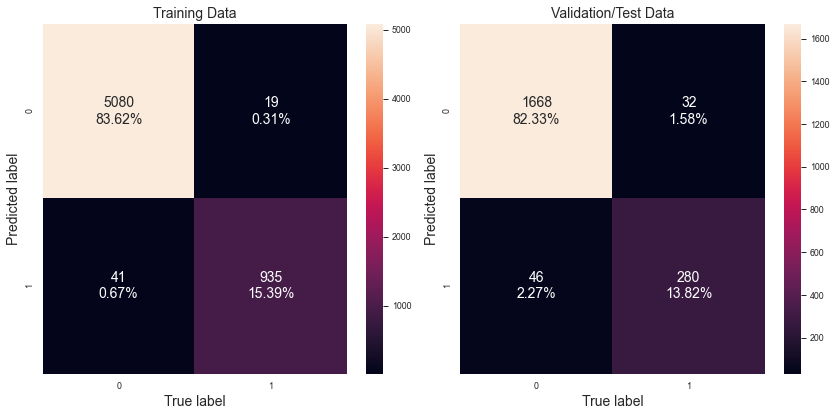

<IPython.core.display.Javascript object>

In [117]:



# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned,
    parameters_gb,
    scoring=scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)
grid_obj = grid_obj.fit(X_train, y_train)

print(
    "\nBest Parameters:{} with CV score: {}".format(grid_obj.best_params_, grid_obj.best_score_)
)


# Set the clf to the best combination of parameters
gbc_tuned_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_grid.fit(X_train, y_train)


display(
    model_performance_classification(
        "Gradient Boosting  - GridSearchCV",
        gbc_tuned_grid,
        X_train,
        y_train,
        X_val,
        y_val,
    )
)

confusion_matrix_classification(
    "Gradient Boosting  - GridSearchCV", gbc_tuned_grid, X_train, y_train, X_val, y_val
)


### Validating with RandomizedSearchCV

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} with CV score=0.9565432098765433:


Model             Data  Data Shape  \
0  Gradient Boosting - RandomizedSearchCV         Training  (6075, 29)   
1  Gradient Boosting - RandomizedSearchCV  Validation/Test  (2026, 29)   

   Recall  F1-Score  Accuracy  Precision  ROC-AUC  
0  95.799    96.891    99.012     98.008   97.713  
1  85.890    87.774    96.150     89.744   92.004

Model 'Gradient Boosting - RandomizedSearchCV' confusion matrix 




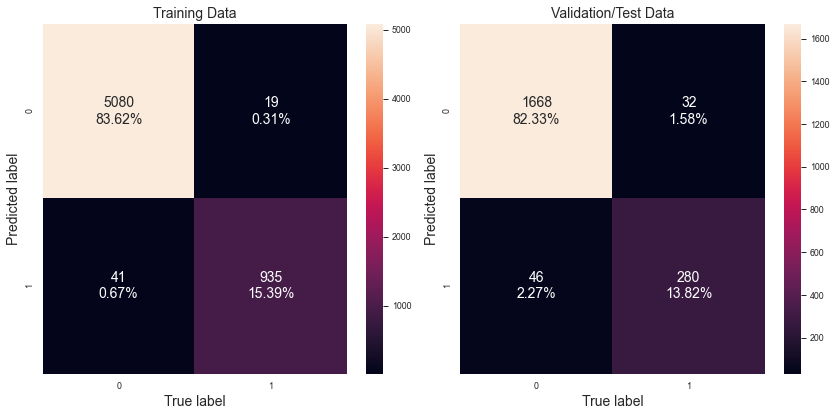

<IPython.core.display.Javascript object>

In [118]:

# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)


# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    gbc_tuned,
    param_distributions=parameters_gb,
    n_iter=50,
    scoring=scorer,
    random_state=1,
    cv=kfold,
    n_jobs=-1,
    verbose=2,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


gbc_tuned_rand = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_rand.fit(X_train, y_train)

display(
    model_performance_classification(
        "Gradient Boosting - RandomizedSearchCV",
        gbc_tuned_rand,
        X_train,
        y_train,
        X_val,
        y_val,
    )
)

confusion_matrix_classification(
    "Gradient Boosting - RandomizedSearchCV",
    gbc_tuned_rand,
    X_train,
    y_train,
    X_val,
    y_val,
)


# Model Performances

### Comparing models After Tuning

* `Decision Tree` - GridsearchCV has better performance & recall score compared to RandomisedsearchCV tuning in decison tree.
* `Bagging` - Overfit on both GridsearchCV and RandomisedsearchCV
* `Gradient Boosting` - Shows better recall and accurancy scores on both GridsearchCV and RandomisedsearchCV compared to bagging and decsion tree models. 


### Comparing `Gradient Boosting`   GridsearchCV and RandomisedsearchCV  - Both results are showing same numbers in all metrics  

**Both GridsearchCV and RandomisedsearchCV picked same param combinations** 

**We can pick RandomisedsearchCV model for productionizing & pipeline** 


# Checking Performance on Train/Validation & Test Data sets

### Metrics with Training & Validation data set

Model             Data  Data Shape  Recall  \
0  Final Model - Train & Validation         Training  (6075, 29)  95.799   
1  Final Model - Train & Validation  Validation/Test  (2026, 29)  85.890   

   F1-Score  Accuracy  Precision  ROC-AUC  
0    96.891    99.012     98.008   97.713  
1    87.774    96.150     89.744   92.004

Model 'Final Model - Train & Validation' confusion matrix 




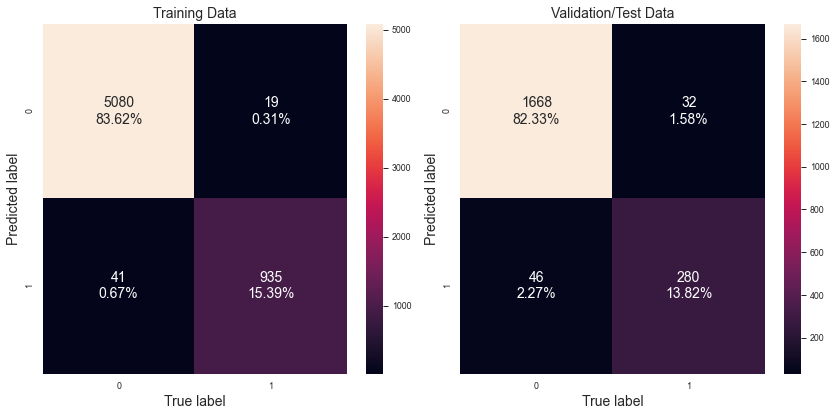

<IPython.core.display.Javascript object>

In [119]:
display(
    model_performance_classification(
        "Final Model - Train & Validation",
        gbc_tuned_rand,
        X_train,
        y_train,
        X_val,
        y_val,
    )
)



confusion_matrix_classification(
    "Final Model - Train & Validation", gbc_tuned_rand, X_train, y_train, X_val, y_val,
)



### Metrics with Training & Test data set

Model             Data  Data Shape  Recall  F1-Score  \
0  Final Model - Train & Test         Training  (6075, 29)  95.799    96.891   
1  Final Model - Train & Test  Validation/Test  (2026, 29)  84.923    89.176   

   Accuracy  Precision  ROC-AUC  
0    99.012     98.008   97.713  
1    96.693     93.878   91.932

Model 'Final Model - Train & Test' confusion matrix 




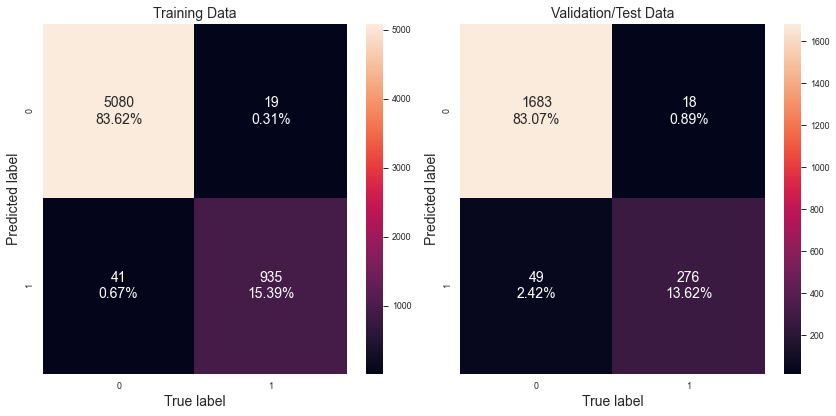

<IPython.core.display.Javascript object>

In [120]:
display(
    model_performance_classification(
        "Final Model - Train & Test", gbc_tuned_rand, X_train, y_train, X_test, y_test,
    )
)


confusion_matrix_classification(
    "Final Model - Train & Test", gbc_tuned_rand, X_train, y_train, X_test, y_test,
)

### Feature importance - Gradient Boosting Tuned Model

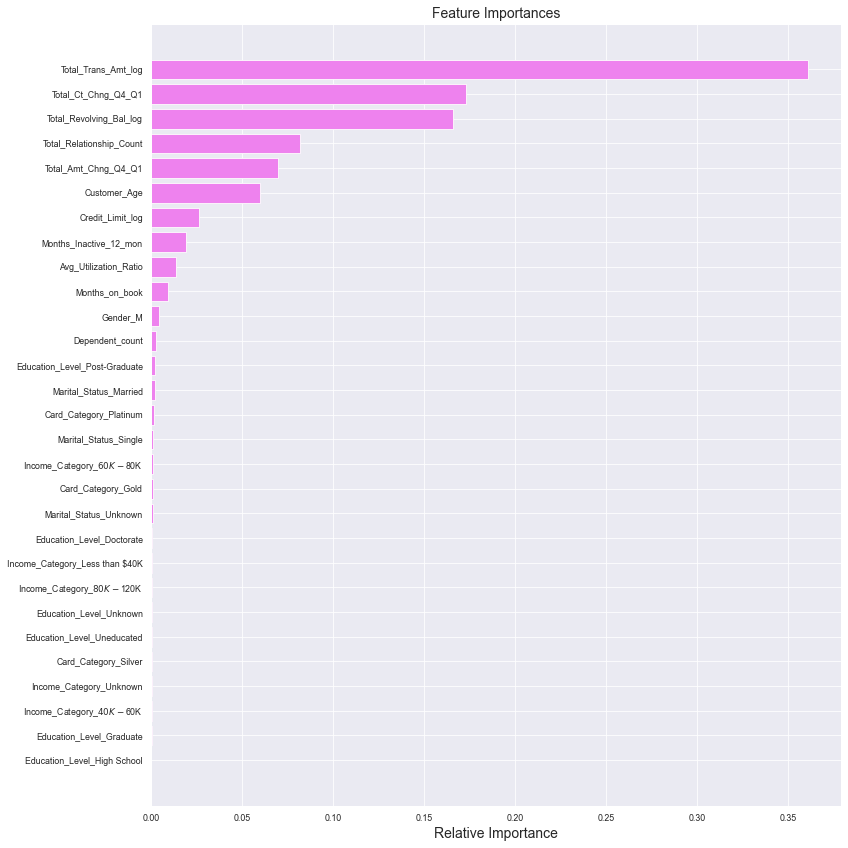

<IPython.core.display.Javascript object>

In [121]:
feature_names = X_train.columns
importances = gbc_tuned_rand.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Important Features  

* Total Transaction Amount, Total transaction ct change q4_q1, total revolving balance, totals accounts in the bank are the top 4 features required to determine customer going to attration account or not 

* As we saw in initial EDA Gender, Matitial Status, Income Level, Education level does not contribute much as numerical features. 

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production.


## Column Transformer

- We will create 2 different pipelines, one for numerical columns and one for categorical columns

### Numerical Pipeline

- For numerical columns, we will do missing value imputation, log transformtion to control data skewness as pre-processing
- Convert Target Feature from Categoricl to numerical 0 & 1

### Categorical Pipeline

- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing
- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

## Pipelines Approach 

- Create Numerical Pipeline
- Create Categorical Pipeline
- Drop Feaures those are not required
- Split Data Train, Validation & Test 
- Apply Transformation for Nuemrical & Categorical
- Train Model with Training data & Validate with Validation data set 
- Final Predictions with Testing Data set 

### Import Libraries

In [122]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

<IPython.core.display.Javascript object>

In [123]:
## Copy Data from orginal data set
# copying orignal data so that when changing data we dont lose original
data1 = bank_data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

### Create Pipeline

In [124]:
# For Log Transform
def log_transform(x):
    return np.log(x + 1)


# Collect all Numerical Columns that needs imputation

numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Total_Revolving_Bal",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Credit_Limit",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]


log_transform_features = [
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
]

# Collect all Categorical Columns that needs imputation
categorical_features = [
    "Education_Level",
    "Gender",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a transformer for numerical variables with data skewness Log Transformation
numeric_log_transformer = Pipeline(steps=[("log", FunctionTransformer(log_transform))])

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("log", numeric_log_transformer, log_transform_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

<IPython.core.display.Javascript object>

### Split & Prepare Data

In [125]:
cols_reqd_X = [
    "Customer_Age",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
]


replaceStruct = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1}}

# Separating target variable and other variables
X = data1[cols_reqd_X]
Y = data1["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})


# import some data within sklearn for iris classification
# iris = datasets.load_iris()
# X = iris.data
# Y = iris.target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


<IPython.core.display.Javascript object>

In [126]:
y_train.value_counts(normalize=True)

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

In [127]:
y_test.value_counts(normalize=True)

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

<IPython.core.display.Javascript object>

### Build Model

In [128]:
# Model Based on Parameters based on hypertuning performance
gbc_tuned = GradientBoostingClassifier(
    random_state=1, subsample=1.0, n_estimators=100, max_depth=5, learning_rate=0.1
)

<IPython.core.display.Javascript object>

### Creating new pipeline with best parameters

In [129]:
# Creating new pipeline with best parameters
final_pipeline_model = Pipeline(
    steps=[("pre", preprocessor), ("GBC-Tuned", gbc_tuned)], verbose=True
)

# Fit the model on training data
final_pipeline_model.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing GBC-Tuned, total=   2.7s


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Credit_Limit',
                                                   'Total_Ct_Chng_Q4_Q1',
               

<IPython.core.display.Javascript object>

### Pipeline Model Metrics with Training & Test data set

Model             Data  Data Shape  Recall  \
0  PipeLine Model - Train & Test         Training  (7088, 16)  94.996   
1  PipeLine Model - Train & Test  Validation/Test  (3039, 16)  84.016   

   F1-Score  Accuracy  Precision  ROC-AUC  
0    96.092    98.758     97.215   97.237  
1    87.701    96.216     91.723   91.283

Model 'PipeLine Model - Train & Test' confusion matrix 




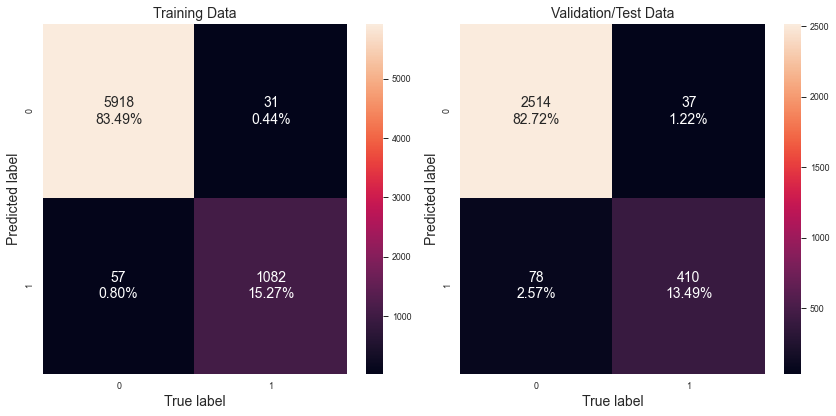

<IPython.core.display.Javascript object>

In [130]:
display(
    model_performance_classification(
        "PipeLine Model - Train & Test",
        final_pipeline_model,
        X_train,
        y_train,
        X_test,
        y_test,
    )
)


confusion_matrix_classification(
    "PipeLine Model - Train & Test",
    final_pipeline_model,
    X_train,
    y_train,
    X_test,
    y_test,
)

### Observations

* Model Build with pipeline Recall score, Accuracy, F1, Precision are all matching with previous tuned model.
* High Recall score, Test shows little less than Training but still model peredict with high recall 
* This model should handle any new data.


## Business Recommendations


#### Model Predicts customer attrition 95% and more. Bank should focus on customer that shows as possible attrition by contacting them understand their concerns and provide a workaround. This would help reating that customer account.

* Foucs on data collection to avoid missing data & collect correct data on Income_Category, Education Category & Marital_Status this will help to predict customer actions accuractly 

* 16% customers accounts ends in attrition as per previous data. Decreseing attrition will eventually ends in more actuve accounts & revenue improvement oppurtnities for bank

* Bank should contact customers if they see inactive for 3-4 months to avoid future attrition

* Customers with more relation on bank like different cards might not use all cards, Bank should contact customers and encourge them to use all card or provide offers on the cards they dont use. This will help any future attrition on unsued accounts 

* 93% customers using Blue card category, As per income category  more customers are eligible for High card tier. Bank should promote those card types for eligible customers.

* Less transactions on given Quater, Bank should reach those customers and encourge them to use cards 

* Customers contacts and still show inactive or less transactions bank should provide them some offers to encourge them to use cards 

* Total Transaction Amount/Credit Limit/Total_Revolving_Balance should be watched and if customers reaching their limit see if customers eligible for increase credit limit, This would allow customers actively use their accounts

* Watch transaction counts/transaction amount of customer, If you see less tranactions compared to previous Quater then bank should reach customer and check their status
